## imports

### import packages

In [ ]:
#-*-coding:utf-8-*-

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from zipfile import ZipFile
import os

import warnings
warnings.filterwarnings('ignore')

from matplotlib import font_manager, rc
import matplotlib

matplotlib.rcParams['font.family'] ='Malgun Gothic'

matplotlib.rcParams['axes.unicode_minus'] =False

In [ ]:
sns.set_style('whitegrid')

### import data

#### ohlcv_data

In [ ]:
zip_file_list = ['commodity.zip', 'currency.zip', 'ohlcv_data.zip']
for zip_file in zip_file_list:
  name = zip_file.split(".")[0]
  with ZipFile(zip_file, 'r') as zip:
    zip.extractall(f'{name}/')
  print('Done')

Done
Done
Done


In [ ]:
# ohlcv 데이터 중 가장 시작 날짜가 늦은 게 무엇인지 알아보자
path = './ohlcv_data/'
ohlcv_file_list = os.listdir(path)
ohlcv_file_list = [file for file in ohlcv_file_list if file.endswith('.csv')]

In [ ]:
# 제일 늦은 것은 2016-03-03 Nikkey225
# 따라서 2016-03-03부터의 데이터를 사용하기로 한다.
# 또한 수익률을 측정해야하기 때문에 pct_change()를 사용해 수익률에 해댱하는 열을 만들어줘야한다.
for file in ohlcv_file_list:
  name = file.split('.')[0]
  df = pd.read_csv(f'ohlcv_data/{file}')
  start_date = df.Date[0]
  print(name, ": ", start_date)

TIGER유로스탁스50(H) :  2014-04-30
KOSEF미국달러선물인버스 :  2011-04-01
KODEX200 :  2002-10-14
KODEX골드선물(H) :  2010-10-01
KOSEF단기자금 :  2010-07-29
KOSEF국고채10년 :  2011-10-20
KBSTAR중기우량회사채 :  2011-04-15
TIGER원유선물(H) :  2010-08-02
TIGER차이나CSI300 :  2014-02-17
KOSEF미국달러선물 :  2011-02-24
KINDEX일본Nikkey225(H) :  2016-03-03
KODEX인버스 :  2009-09-16
TIGER코스닥150 :  2015-11-12
TIGER미국SP500선물(H) :  2011-07-18
TIGER단기선진하이일드(H) :  2014-03-24


In [ ]:
def import_ohlcv_data(start, file):
  file_path = f'ohlcv_data/{file}'  # 파일 불러오기
  df = pd.read_csv(file_path)
  df = df[df.Date >= start].reset_index(drop=True)  # 시작하는 날짜보다 뒤에 있는 것만 가져오기
  df["Rate"] = df['Close'].pct_change()
  df.dropna(inplace=True)
  df['Rate'] = (np.exp(np.log(df["Rate"]+1).rolling(10).sum())-1).shift(-10)
  df.dropna(inplace=True)
  
  return df

In [ ]:
# 데이터 가져오기
KOSEF국고채10년 = import_ohlcv_data('2016-03-03', 'KOSEF국고채10년.csv')
TIGER원유선물 = import_ohlcv_data('2016-03-03', 'TIGER원유선물(H).csv')
KBSTAR중기우량회사채 = import_ohlcv_data('2016-03-03', 'KBSTAR중기우량회사채.csv')
KOSEF미국달러선물 = import_ohlcv_data('2016-03-03', 'KOSEF미국달러선물.csv')
TIGER차이나CSI300 = import_ohlcv_data('2016-03-03', 'TIGER차이나CSI300.csv')
KODEX200 = import_ohlcv_data('2016-03-03', 'KODEX200.csv')
KOSEF미국달러선물인버스 = import_ohlcv_data('2016-03-03', 'KOSEF미국달러선물인버스.csv')
KINDEX일본Nikkey225 = import_ohlcv_data('2016-03-03', 'KINDEX일본Nikkey225(H).csv')
KOSEF단기자금 = import_ohlcv_data('2016-03-03', 'KOSEF단기자금.csv')
TIGER유로스탁스50 = import_ohlcv_data('2016-03-03', 'TIGER유로스탁스50(H).csv')
KODEX골드선물 = import_ohlcv_data('2016-03-03', 'KODEX골드선물(H).csv')
TIGER미국SP500선물 = import_ohlcv_data('2016-03-03', 'TIGER미국SP500선물(H).csv')
TIGER코스닥150 = import_ohlcv_data('2016-03-03', 'TIGER코스닥150.csv')
TIGER단기선진하이일드 = import_ohlcv_data('2016-03-03', 'TIGER단기선진하이일드(H).csv')
KODEX인버스 = import_ohlcv_data('2016-03-03', 'KODEX인버스.csv')

In [ ]:
etf_list = [TIGER단기선진하이일드, TIGER코스닥150, TIGER유로스탁스50, KODEX인버스,
            KODEX골드선물, KODEX200, KOSEF단기자금, KOSEF미국달러선물, TIGER원유선물,
            TIGER미국SP500선물, KOSEF국고채10년, KBSTAR중기우량회사채, TIGER차이나CSI300,
            KOSEF미국달러선물인버스, KINDEX일본Nikkey225]
name_list = []
for file in ohlcv_file_list:
  name_list.append(file.split('.')[0])

close_dict = {}
for i in range(len(etf_list)):
  name = name_list[i] +'_Close'
  close_dict[name] = etf_list[i].Close

close_price = pd.DataFrame(close_dict)
close_price['Date'] = KODEX200.Date
close_price

,TIGER유로스탁스50(H)_Close,KOSEF미국달러선물인버스_Close,KODEX200_Close,KODEX골드선물(H)_Close,KOSEF단기자금_Close,KOSEF국고채10년_Close,KBSTAR중기우량회사채_Close,TIGER원유선물(H)_Close,TIGER차이나CSI300_Close,KOSEF미국달러선물_Close,KINDEX일본Nikkey225(H)_Close,KODEX인버스_Close,TIGER코스닥150_Close,TIGER미국SP500선물(H)_Close,TIGER단기선진하이일드(H)_Close,Date
1,9530,10413,9645,8250,9745,21245,93723,11972,3600,23275,110863,94041,6848,10410,10540,2016-03-04
2,9565,10360,9640,8230,9725,21288,93728,11928,3765,23290,110867,94201,6880,10430,10515,2016-03-07
3,9570,10368,9635,8295,9790,21137,93718,11981,3800,23265,111188,94201,6819,10385,10465,2016-03-08
4,9565,10432,9580,8260,9685,21232,93741,12098,3745,23215,111132,94069,6796,10300,10360,2016-03-09
5,9555,10489,9590,8200,9640,21424,93728,11967,3810,23255,111026,94243,6810,10415,10480,2016-03-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,11755,11775,12185,4710,12540,33000,101395,13465,5975,44940,107980,101785,10435,9295,17785,2022-06-13
1544,11555,11785,12260,4725,12290,32870,101385,13495,6150,44645,107800,101475,10450,9285,17635,2022-06-14
1545,11495,11470,12165,4820,12220,32285,101360,13540,6015,44075,106660,101275,10895,9250,17320,2022-06-15
1546,11615,11585,12205,4820,12305,32265,101310,13500,5900,44230,107040,101175,10730,9275,17415,2022-06-16


In [ ]:
etf_list = [TIGER단기선진하이일드, TIGER코스닥150, TIGER유로스탁스50, KODEX인버스,
            KODEX골드선물, KODEX200, KOSEF단기자금, KOSEF미국달러선물, TIGER원유선물,
            TIGER미국SP500선물, KOSEF국고채10년, KBSTAR중기우량회사채, TIGER차이나CSI300,
            KOSEF미국달러선물인버스, KINDEX일본Nikkey225]
name_list = []
for file in ohlcv_file_list:
  name_list.append(file.split('.')[0])

volume_dict = {}
for i in range(len(etf_list)):
  name = name_list[i] +'_Volume'
  volume_dict[name] = etf_list[i].Volume

volume = pd.DataFrame(volume_dict)
volume['Date'] = KODEX200.Date
volume

,TIGER유로스탁스50(H)_Volume,KOSEF미국달러선물인버스_Volume,KODEX200_Volume,KODEX골드선물(H)_Volume,KOSEF단기자금_Volume,KOSEF국고채10년_Volume,KBSTAR중기우량회사채_Volume,TIGER원유선물(H)_Volume,TIGER차이나CSI300_Volume,KOSEF미국달러선물_Volume,KINDEX일본Nikkey225(H)_Volume,KODEX인버스_Volume,TIGER코스닥150_Volume,TIGER미국SP500선물(H)_Volume,TIGER단기선진하이일드(H)_Volume,Date
1,201,429737,3274,16488203,142158,7658963,402337,28062,2126369,20731,90,3,512798,11432,25,2016-03-04
2,384,422480,10172,9586362,67391,6940749,247118,56605,3942217,26105,98,82,490423,114302,308662,2016-03-07
3,2,421993,7420,16426298,126211,6926830,200878,25354,3438044,4126,14,0,507145,3178,336969,2016-03-08
4,2,436810,4272,12569213,47065,6053743,719311,10249,1870277,27461,779,104,484589,704,316169,2016-03-09
5,1,423083,5708,22581765,34029,9241212,165302,14659,1862786,10555,762,55,491465,1165,310932,2016-03-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,770,838220,6665,36053867,253462,9434444,6006,7717,101057,180265,22509,575,64700,3540,1689,2022-06-13
1544,74,426469,17399,41348697,187773,12194953,390,22270,445573,55982,26010,8907,68899,3241,1397,2022-06-14
1545,295,288831,7611,40275675,156627,10540450,541,6175,431278,14815,32000,1256,216203,809,1267,2022-06-15
1546,398,155076,7275,42514368,134457,9186440,4013,5864,305096,30329,30705,754,106074,7534,133,2022-06-16


#### famma_french_daily_factor는 4/29 이후로 업데이트가 중단되어 사용하기가 어려울 것으로 보인다...

#### currency 

In [ ]:
Currency = pd.read_csv('currency/currency.csv')
Currency = Currency[Currency.Date >= '2016-03-04'].reset_index(drop=True) # 시작하는 날짜보다 뒤에 있는 것만 가져오기

In [ ]:
currency_list = ['USD', 'JPY', 'CNY', 'EUR']  # 환율 마다 스케일이 다르기 때문에 환율의 변화율로 보는 것이 더 적합하다.
for currency in currency_list:                # 따라서 환율의 변화율을 변수로 설정해주도록 한다.
  col = currency + ' Change'
  Currency[col] = Currency[currency].pct_change()

Currency.drop(currency_list, axis=1, inplace=True)
Currency.fillna(0, inplace=True)

In [ ]:
Currency.head()

,Date,USD Change,JPY Change,CNY Change,EUR Change
0,2016-03-04,0.000000,0.000000,0.000000,0.000000
1,2016-03-07,0.001160,0.003778,-0.000217,0.002078
2,2016-03-08,0.008626,0.015867,0.010156,0.007431
3,2016-03-09,-0.000322,-0.007512,-0.001828,-0.000548
4,2016-03-10,-0.003645,-0.000544,-0.001885,0.013024


#### Commodity

In [ ]:
path = './commodity/'
commodity_file_list = os.listdir(path)
commodity_file_list = [file for file in commodity_file_list if file.endswith('.csv')]

In [ ]:
def import_commodity_data(start, file):
  file_path = f'commodity/{file}'  # 파일 불러오기
  name = file.split('.')[0]
  df = pd.read_csv(file_path)
  df = df[df.Date >= start].reset_index(drop=True)  # 시작하는 날짜보다 뒤에 있는 것만 가져오기
  df = df.iloc[:,:2]                                # Date를 뺀 가장 첫번째 열이 모두 가격을 나타내므로 이것만을 사용하기로 한다
  df.columns = ['Date', f'{name} Price']                    # 열 이름을 똑같이 변경
  return df

In [ ]:
gold = import_commodity_data('2016-03-04', 'gold.csv')
silver = import_commodity_data('2016-03-04', 'silver.csv')
natural_gas = import_commodity_data('2016-03-04', 'natural_gas.csv')
oil = import_commodity_data('2016-03-04', 'oil.csv')

In [ ]:
gold

,Date,gold Price
0,2016-03-04,1279.900024
1,2016-03-07,1272.300049
2,2016-03-08,1276.300049
3,2016-03-09,1260.000000
4,2016-03-10,1273.000000
...,...,...
1587,2022-06-27,1830.699951
1588,2022-06-28,1826.000000
1589,2022-06-29,1830.300049
1590,2022-06-30,1817.300049


## Make Model

### preparation

In [ ]:
print(ohlcv_file_list)
print(commodity_file_list)
print(['Currency'])

['TIGER유로스탁스50(H).csv', 'KOSEF미국달러선물인버스.csv', 'KODEX200.csv', 'KODEX골드선물(H).csv', 'KOSEF단기자금.csv', 'KOSEF국고채10년.csv', 'KBSTAR중기우량회사채.csv', 'TIGER원유선물(H).csv', 'TIGER차이나CSI300.csv', 'KOSEF미국달러선물.csv', 'KINDEX일본Nikkey225(H).csv', 'KODEX인버스.csv', 'TIGER코스닥150.csv', 'TIGER미국SP500선물(H).csv', 'TIGER단기선진하이일드(H).csv']
['gold.csv', 'silver.csv', 'natural_gas.csv', 'oil.csv']
['Currency']


In [ ]:
ohlcv_list = [KOSEF국고채10년, 
 TIGER원유선물,
 KBSTAR중기우량회사채,
 KOSEF미국달러선물,
 TIGER차이나CSI300,
 KODEX200,
 KOSEF미국달러선물인버스,
 KINDEX일본Nikkey225,
 KOSEF단기자금,
 TIGER유로스탁스50,
 KODEX골드선물,
 TIGER미국SP500선물,
 TIGER코스닥150,
 TIGER단기선진하이일드,
 KODEX인버스]
commodity_list = [gold, natural_gas, oil, silver]
economy_list = [Currency]
total_feature_list = commodity_list  +economy_list+ [close_price]+[volume]

In [ ]:
def merge_data_set(dataset, feature_list):
  df = dataset
  for feature in feature_list:
    df = pd.merge(df, feature, how='left')
  df[['USD Change', 'JPY Change', 'CNY Change', 'EUR Change']] = df[['USD Change', 'JPY Change', 'CNY Change', 'EUR Change']].fillna(0)
  df = df.fillna(method='ffill')
  return df

### KODEX200

In [ ]:
feature_list = total_feature_list
KODEX200_combined = merge_data_set(KODEX200, feature_list)
KODEX200_combined.tail()

,Date,Open,High,Low,Close,Volume,Rate,gold Price,natural_gas Price,oil Price,...,KOSEF국고채10년_Volume,KBSTAR중기우량회사채_Volume,TIGER원유선물(H)_Volume,TIGER차이나CSI300_Volume,KOSEF미국달러선물_Volume,KINDEX일본Nikkey225(H)_Volume,KODEX인버스_Volume,TIGER코스닥150_Volume,TIGER미국SP500선물(H)_Volume,TIGER단기선진하이일드(H)_Volume
1542,2022-06-13,33510,33610,33000,33000,9434444,-0.039848,1873.800049,8.950,122.250000,...,9434444,6006,7717,101057,180265,22509,575,64700,3540,1689
1543,2022-06-14,32410,32955,32410,32870,12194953,-0.028598,1825.500000,8.889,123.680000,...,12194953,390,22270,445573,55982,26010,8907,68899,3241,1397
1544,2022-06-15,32805,32865,32080,32285,10540450,-0.027567,1839.000000,7.698,119.610001,...,10540450,541,6175,431278,14815,32000,1256,216203,809,1267
1545,2022-06-16,32695,32930,32220,32265,9186440,-0.043081,1850.599976,8.027,118.080002,...,9186440,4013,5864,305096,30329,30705,754,106074,7534,133
1546,2022-06-17,31680,32105,31570,32025,7291657,-0.045746,1853.699951,7.588,118.970001,...,7291657,8868,8482,642832,192865,45930,1504,55885,6671,46638


In [ ]:
KODEX200_combined.drop(['Date', 'KODEX200_Close','KODEX200_Volume'], axis=1, inplace=True)

In [ ]:
X = KODEX200_combined.drop('Rate', axis=1)
y = KODEX200_combined[['Rate']]

In [ ]:
X = X.clip(lower=X.quantile(0.05),upper=X.quantile(0.95), axis=1)
y = y.clip(lower=y.quantile(0.05),upper=y.quantile(0.95), axis=1)

In [ ]:
print(f'윈저화된 값: 최소({float(y.min())}), 최대({float(y.max())})')

윈저화된 값: 최소(-0.05033592113920574), 최대(0.055855346996650436)


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.83524623e-01, 7.92893739e-01, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.64589714e-01, 1.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.78740755e-01, 2.19866428e-01, 1.00000000e+00],
       ...,
       [5.48922935e-01, 5.42899784e-01, 5.25240439e-01, ...,
        1.32530234e-01, 5.54005082e-02, 3.99489883e-03],
       [5.43422605e-01, 5.46133373e-01, 5.32308469e-01, ...,
        3.93332441e-02, 5.22278224e-01, 3.01888906e-04],
       [4.92669560e-01, 5.05091660e-01, 4.99492616e-01, ...,
        0.00000000e+00, 4.62365143e-01, 1.51751118e-01]])

#### option(사용하면 R2 값이 개선되고, 방향을 더 잘 맞추는 것 같다)
#### 무조건 사용하자!

In [ ]:
def make_windowed_dataset(dataset,time_step):
  windowed_dataset = []
  for i in range(0,len(dataset)-time_step+1) :
    windowed_dataset.append(dataset[i:i+time_step])
  return np.array(windowed_dataset)

In [ ]:
X_scaled.shape

(1547, 41)

In [ ]:
num = 10
X_scaled = make_windowed_dataset(X_scaled, num)
X_scaled.shape

(1538, 10, 41)

In [ ]:
X_scaled = X_scaled.mean(axis=1)
X_scaled.shape

(1538, 41)

In [ ]:
# 끝에 10개의 데이터는 사용하지 못함
y = y.iloc[:-(num-1)].reset_index(drop=True)
y.shape

(1538, 1)

#### train_test_split

In [ ]:
np.random.seed(42)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_scaled,y, test_size=0.2, shuffle=False)

#### LightGBM

In [ ]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
lgbm =LGBMRegressor()
lgbm.fit(X_train, y_train)

LGBMRegressor()

In [ ]:
pred = lgbm.predict(X_test)
y_test = y_test.reset_index(drop=True)
print(f'RMSE: {np.sqrt(mean_squared_error(pred,y_test))}')
print(f'MAE: {mean_absolute_error(pred,y_test)}')
print(f'R2: {r2_score(pred, y_test)}')

RMSE: 0.021052452820241173
MAE: 0.0164995544442887
R2: -2.701978764318738


No handles with labels found to put in legend.


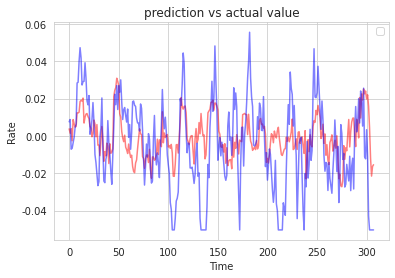

In [ ]:
plt.plot(pred, color='red', alpha=0.5)
plt.plot(y_test,color='blue',alpha=0.5)
plt.title('prediction vs actual value')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()

#### 다음 주 예측

* 이전 6 영업일 만큼의 데이터가 필요하다. 

In [ ]:
def predict_data(start, file):
  file_path = f'ohlcv_data/{file}'  # 파일 불러오기
  df = pd.read_csv(file_path)
  df = df[df.Date >= start].reset_index(drop=True)  # 시작하는 날짜보다 뒤에 있는 것만 가져오기
  #df["Rate"] = df['Close'].pct_change()
  #df.dropna(inplace=True)
  #df['Rate'] = (np.exp(np.log(df["Rate"]+1).rolling(5).sum())-1).shift(-5)
  #df.dropna(inplace=True)
  
  return df


KODEX200_predict = predict_data('2016-03-04', 'KODEX200.csv')
#KODEX200_predict.tail()
KODEX200_combined_predict = merge_data_set(KODEX200_predict, feature_list)
test=KODEX200_combined_predict.iloc[-num:]
test.drop(['Date', 'KODEX200_Close','KODEX200_Volume'],axis=1,inplace=True)

test=scaler.transform(test)
test.shape

(10, 41)

In [ ]:
test=test.reshape(1,num,41)
test=test.mean(axis=1)
#print(test.shape)

pred_kodex200=lgbm.predict(test)
pred_kodex200=pd.DataFrame({'prediction':pred_kodex200})
pred_kodex200.index = ["KODEX200"]
pred_kodex200.to_csv('Pred.csv', encoding='utf-8-sig')

### KODEX인버스

In [ ]:
feature_list = total_feature_list
KODEX인버스_combined = merge_data_set(KODEX인버스, feature_list)
KODEX인버스_combined.tail()

,Date,Open,High,Low,Close,Volume,Rate,gold Price,natural_gas Price,oil Price,...,KOSEF국고채10년_Volume,KBSTAR중기우량회사채_Volume,TIGER원유선물(H)_Volume,TIGER차이나CSI300_Volume,KOSEF미국달러선물_Volume,KINDEX일본Nikkey225(H)_Volume,KODEX인버스_Volume,TIGER코스닥150_Volume,TIGER미국SP500선물(H)_Volume,TIGER단기선진하이일드(H)_Volume
1542,2022-06-13,4650,4715,4630,4710,36053867,0.038217,1873.800049,8.950,122.250000,...,9434444,6006,7717,101057,180265,22509,575,64700,3540,1689
1543,2022-06-14,4775,4795,4720,4725,41348697,0.027513,1825.500000,8.889,123.680000,...,12194953,390,22270,445573,55982,26010,8907,68899,3241,1397
1544,2022-06-15,4745,4850,4735,4820,40275675,0.024896,1839.000000,7.698,119.610001,...,10540450,541,6175,431278,14815,32000,1256,216203,809,1267
1545,2022-06-16,4760,4825,4715,4820,42514368,0.042531,1850.599976,8.027,118.080002,...,9186440,4013,5864,305096,30329,30705,754,106074,7534,133
1546,2022-06-17,4910,4925,4840,4855,48576568,0.044284,1853.699951,7.588,118.970001,...,7291657,8868,8482,642832,192865,45930,1504,55885,6671,46638


In [ ]:
KODEX인버스_combined.drop(['Date', 'KODEX인버스_Close','KODEX인버스_Volume'], axis=1, inplace=True)

In [ ]:
X = KODEX인버스_combined.drop('Rate', axis=1)
y = KODEX인버스_combined[['Rate']]

In [ ]:
X = X.clip(lower=X.quantile(0.05),upper=X.quantile(0.95), axis=1)
y = y.clip(lower=y.quantile(0.05),upper=y.quantile(0.95), axis=1)

In [ ]:
print(f'윈저화된 값: 최소({float(y.min())}), 최대({float(y.max())})')

윈저화된 값: 최소(-0.05576677698753614), 최대(0.053521574148795485)


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        3.83524623e-01, 7.92893739e-01, 0.00000000e+00],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        3.64589714e-01, 1.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        3.78740755e-01, 2.19866428e-01, 1.00000000e+00],
       ...,
       [2.18268090e-01, 2.35677856e-01, 2.21812998e-01, ...,
        1.32530234e-01, 5.54005082e-02, 3.99489883e-03],
       [2.21826809e-01, 2.29747361e-01, 2.17060710e-01, ...,
        3.93332441e-02, 5.22278224e-01, 3.01888906e-04],
       [2.57413998e-01, 2.53469339e-01, 2.46762504e-01, ...,
        0.00000000e+00, 4.62365143e-01, 1.51751118e-01]])

#### option(사용하면 R2 값이 개선되고, 방향을 더 잘 맞추는 것 같다)
#### 무조건 사용하자!

In [ ]:
X_scaled.shape

(1547, 41)

In [ ]:
num = 10
X_scaled = make_windowed_dataset(X_scaled, num)
X_scaled.shape

(1538, 10, 41)

In [ ]:
X_scaled = X_scaled.mean(axis=1)
X_scaled.shape

(1538, 41)

In [ ]:
# 끝에 10개의 데이터는 사용하지 못함
y = y.iloc[:-(num-1)].reset_index(drop=True)
y.shape

(1538, 1)

#### train_test_split

In [ ]:
np.random.seed(42)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_scaled,y, test_size=0.2, shuffle=False)

#### LightGBM

In [ ]:
lgbm =LGBMRegressor()
lgbm.fit(X_train, y_train)

LGBMRegressor()

In [ ]:
pred = lgbm.predict(X_test)
y_test = y_test.reset_index(drop=True)
print(f'RMSE: {np.sqrt(mean_squared_error(pred,y_test))}')
print(f'MAE: {mean_absolute_error(pred,y_test)}')
print(f'R2: {r2_score(pred, y_test)}')

RMSE: 0.02150091968386561
MAE: 0.01654869196422631
R2: -2.5928336917469172


No handles with labels found to put in legend.


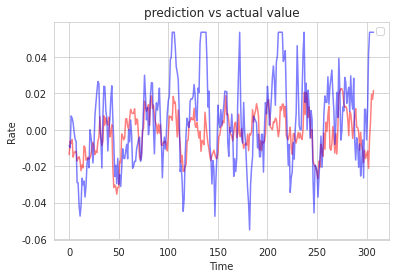

In [ ]:
plt.plot(pred, color='red', alpha=0.5)
plt.plot(y_test,color='blue',alpha=0.5)
plt.title('prediction vs actual value')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()

#### 다음 주 예측

* 이전 10 영업일 만큼의 데이터가 필요하다. 

In [ ]:
def predict_data(start, file):
  file_path = f'ohlcv_data/{file}'  # 파일 불러오기
  df = pd.read_csv(file_path)
  df = df[df.Date >= start].reset_index(drop=True)  # 시작하는 날짜보다 뒤에 있는 것만 가져오기
  return df

KODEX인버스_predict = predict_data('2016-03-04', 'KODEX인버스.csv')
KODEX인버스_combined_predict = merge_data_set(KODEX인버스_predict, feature_list)
test=KODEX인버스_combined_predict.iloc[-num:]
test.drop(['Date', 'KODEX인버스_Close','KODEX인버스_Volume'],axis=1,inplace=True)

test=scaler.transform(test)
test.shape

(10, 41)

In [ ]:
test=test.reshape(1,num,41)
test=test.mean(axis=1)
pred_KODEX인버스 = lgbm.predict(test)
pred_KODEX인버스=pd.DataFrame({"prediction":pred_KODEX인버스})
pred_KODEX인버스.index = ['KODEX인버스']

pred_KODEX인버스.to_csv('Pred.csv', encoding='utf-8-sig', mode='a', header=False)

### TIGER코스닥150

In [ ]:
feature_list = total_feature_list
TIGER코스닥150_combined = merge_data_set(TIGER코스닥150, feature_list)
TIGER코스닥150_combined.tail()

,Date,Open,High,Low,Close,Volume,Rate,gold Price,natural_gas Price,oil Price,...,KOSEF국고채10년_Volume,KBSTAR중기우량회사채_Volume,TIGER원유선물(H)_Volume,TIGER차이나CSI300_Volume,KOSEF미국달러선물_Volume,KINDEX일본Nikkey225(H)_Volume,KODEX인버스_Volume,TIGER코스닥150_Volume,TIGER미국SP500선물(H)_Volume,TIGER단기선진하이일드(H)_Volume
1542,2022-06-13,12080,12080,11740,11775,838220,-0.035244,1873.800049,8.950,122.250000,...,9434444,6006,7717,101057,180265,22509,575,64700,3540,1689
1543,2022-06-14,11630,11830,11520,11785,426469,-0.049215,1825.500000,8.889,123.680000,...,12194953,390,22270,445573,55982,26010,8907,68899,3241,1397
1544,2022-06-15,11785,11865,11435,11470,288831,-0.046207,1839.000000,7.698,119.610001,...,10540450,541,6175,431278,14815,32000,1256,216203,809,1267
1545,2022-06-16,11750,11830,11505,11585,155076,-0.075097,1850.599976,8.027,118.080002,...,9186440,4013,5864,305096,30329,30705,754,106074,7534,133
1546,2022-06-17,11370,11515,11295,11500,134849,-0.086957,1853.699951,7.588,118.970001,...,7291657,8868,8482,642832,192865,45930,1504,55885,6671,46638


In [ ]:
TIGER코스닥150_combined.drop(['Date', 'TIGER코스닥150_Close','TIGER코스닥150_Volume'], axis=1, inplace=True)

In [ ]:
X = TIGER코스닥150_combined.drop('Rate', axis=1)
y = TIGER코스닥150_combined[['Rate']]

In [ ]:
X = X.clip(lower=X.quantile(0.05),upper=X.quantile(0.95), axis=1)
y = y.clip(lower=y.quantile(0.05),upper=y.quantile(0.95), axis=1)

In [ ]:
print(f'윈저화된 값: 최소({float(y.min())}), 최대({float(y.max())})')

윈저화된 값: 최소(-0.08081133001541861), 최대(0.07588346531353878)


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[2.50557748e-01, 2.43383394e-01, 2.53563510e-01, ...,
        0.00000000e+00, 7.92893739e-01, 0.00000000e+00],
       [2.58046398e-01, 2.47538007e-01, 2.52771619e-01, ...,
        4.58281140e-03, 1.00000000e+00, 1.00000000e+00],
       [2.47749505e-01, 2.35843540e-01, 2.32182452e-01, ...,
        0.00000000e+00, 2.19866428e-01, 1.00000000e+00],
       ...,
       [4.63204206e-01, 4.60038776e-01, 4.24453595e-01, ...,
        9.42531545e-02, 5.54005082e-02, 3.99489883e-03],
       [4.57743732e-01, 4.54653167e-01, 4.35540070e-01, ...,
        5.59102991e-02, 5.22278224e-01, 3.01888906e-04],
       [3.98458586e-01, 4.06182680e-01, 4.02280646e-01, ...,
        1.13195442e-01, 4.62365143e-01, 1.51751118e-01]])

#### option(사용하면 R2 값이 개선되고, 방향을 더 잘 맞추는 것 같다)
#### 무조건 사용하자!

In [ ]:
X_scaled.shape

(1547, 41)

In [ ]:
num = 10
X_scaled = make_windowed_dataset(X_scaled, num)
X_scaled.shape

(1538, 10, 41)

In [ ]:
X_scaled = X_scaled.mean(axis=1)
X_scaled.shape

(1538, 41)

In [ ]:
# 끝에 10개의 데이터는 사용하지 못함
y = y.iloc[:-(num-1)].reset_index(drop=True)
y.shape

(1538, 1)

#### train_test_split

In [ ]:
np.random.seed(42)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_scaled,y, test_size=0.2, shuffle=False)

#### LightGBM

In [ ]:
lgbm =LGBMRegressor()
lgbm.fit(X_train, y_train)

LGBMRegressor()

In [ ]:
pred = lgbm.predict(X_test)
y_test = y_test.reset_index(drop=True)
print(f'RMSE: {np.sqrt(mean_squared_error(pred,y_test))}')
print(f'MAE: {mean_absolute_error(pred,y_test)}')
print(f'R2: {r2_score(pred, y_test)}')

RMSE: 0.03889600332981368
MAE: 0.03207165620126976
R2: -3.1365182877133426


No handles with labels found to put in legend.


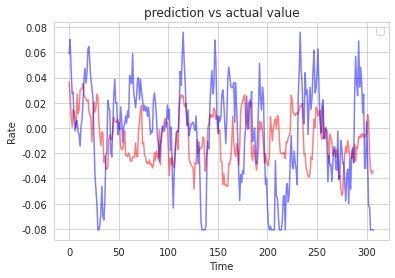

In [ ]:
plt.plot(pred, color='red', alpha=0.5)
plt.plot(y_test,color='blue',alpha=0.5)
plt.title('prediction vs actual value')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()

#### 다음 주 예측

In [ ]:
def predict_data(start, file):
  file_path = f'ohlcv_data/{file}'  # 파일 불러오기
  df = pd.read_csv(file_path)
  df = df[df.Date >= start].reset_index(drop=True)  # 시작하는 날짜보다 뒤에 있는 것만 가져오기
  return df

TIGER코스닥150_predict = predict_data('2016-03-04', 'TIGER코스닥150.csv')
TIGER코스닥150_combined_predict = merge_data_set(TIGER코스닥150_predict, feature_list)
test=TIGER코스닥150_combined_predict.iloc[-num:]
test.drop(['Date', 'TIGER코스닥150_Close','TIGER코스닥150_Volume'],axis=1,inplace=True)

test=scaler.transform(test)
test.shape

(10, 41)

In [ ]:
test=test.reshape(1,num,41)
test=test.mean(axis=1)
pred_TIGER코스닥150 = lgbm.predict(test)
pred_TIGER코스닥150=pd.DataFrame({"prediction":pred_TIGER코스닥150})
pred_TIGER코스닥150.index = ['TIGER코스닥150']

pred_TIGER코스닥150.to_csv('Pred.csv', encoding='utf-8-sig', mode='a', header=False)

### KINDEX일본Nikkey225

In [ ]:
feature_list = total_feature_list
KINDEX일본Nikkey225_combined = merge_data_set(KINDEX일본Nikkey225, feature_list)
KINDEX일본Nikkey225_combined.tail()

,Date,Open,High,Low,Close,Volume,Rate,gold Price,natural_gas Price,oil Price,...,KOSEF국고채10년_Volume,KBSTAR중기우량회사채_Volume,TIGER원유선물(H)_Volume,TIGER차이나CSI300_Volume,KOSEF미국달러선물_Volume,KINDEX일본Nikkey225(H)_Volume,KODEX인버스_Volume,TIGER코스닥150_Volume,TIGER미국SP500선물(H)_Volume,TIGER단기선진하이일드(H)_Volume
1542,2022-06-13,17915,17915,17750,17785,1689,-0.005060,1873.800049,8.950,122.250000,...,9434444,6006,7717,101057,180265,22509,575,64700,3540,1689
1543,2022-06-14,17660,17660,17375,17635,1397,0.010207,1825.500000,8.889,123.680000,...,12194953,390,22270,445573,55982,26010,8907,68899,3241,1397
1544,2022-06-15,17485,17485,17320,17320,1267,0.017610,1839.000000,7.698,119.610001,...,10540450,541,6175,431278,14815,32000,1256,216203,809,1267
1545,2022-06-16,17695,17695,17415,17415,133,0.001723,1850.599976,8.027,118.080002,...,9186440,4013,5864,305096,30329,30705,754,106074,7534,133
1546,2022-06-17,17025,17175,16955,17085,46638,0.001171,1853.699951,7.588,118.970001,...,7291657,8868,8482,642832,192865,45930,1504,55885,6671,46638


In [ ]:
KINDEX일본Nikkey225_combined.drop(['Date', 'KINDEX일본Nikkey225(H)_Close','KINDEX일본Nikkey225(H)_Volume'], axis=1, inplace=True)

In [ ]:
X = KINDEX일본Nikkey225_combined.drop('Rate', axis=1)
y = KINDEX일본Nikkey225_combined[['Rate']]

In [ ]:
X = X.clip(lower=X.quantile(0.05),upper=X.quantile(0.95), axis=1)
y = y.clip(lower=y.quantile(0.05),upper=y.quantile(0.95), axis=1)

In [ ]:
print(f'윈저화된 값: 최소({float(y.min())}), 최대({float(y.max())})')

윈저화된 값: 최소(-0.05779624968208386), 최대(0.06232490063403479)


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
scaler =MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[2.45364089e-02, 1.67286245e-02, 3.15867495e-02, ...,
        3.83524623e-01, 7.92893739e-01, 0.00000000e+00],
       [2.51017639e-02, 1.61653712e-02, 2.30343805e-02, ...,
        3.64589714e-01, 1.00000000e+00, 1.00000000e+00],
       [2.28403437e-02, 1.39123578e-02, 7.06995838e-03, ...,
        3.78740755e-01, 2.19866428e-01, 1.00000000e+00],
       ...,
       [8.09814564e-01, 7.97961023e-01, 8.04720908e-01, ...,
        1.32530234e-01, 5.54005082e-02, 3.99489883e-03],
       [8.33559475e-01, 8.21617664e-01, 8.15553908e-01, ...,
        3.93332441e-02, 5.22278224e-01, 3.01888906e-04],
       [7.57801900e-01, 7.63039315e-01, 7.63099379e-01, ...,
        0.00000000e+00, 4.62365143e-01, 1.51751118e-01]])

#### option(사용하면 R2 값이 개선되고, 방향을 더 잘 맞추는 것 같다)
#### 무조건 사용하자!

In [ ]:
num = 8
X_scaled = make_windowed_dataset(X_scaled, num)
X_scaled.shape

(1540, 8, 41)

In [ ]:
X_scaled = X_scaled.mean(axis=1)
X_scaled.shape

(1540, 41)

In [ ]:
# 끝에 10개의 데이터는 사용하지 못함
y = y.iloc[:-(num-1)].reset_index(drop=True)
y.shape

(1540, 1)

#### train_test_split

In [ ]:
np.random.seed(42)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_scaled,y, test_size=0.2, shuffle=False)

#### LightGBM

In [ ]:
lgbm =LGBMRegressor()
lgbm.fit(X_train, y_train)

LGBMRegressor()

In [ ]:
pred = lgbm.predict(X_test)
y_test = y_test.reset_index(drop=True)
print(f'RMSE: {np.sqrt(mean_squared_error(pred,y_test))}')
print(f'MAE: {mean_absolute_error(pred,y_test)}')
print(f'R2: {r2_score(pred, y_test)}')

RMSE: 0.02987720045469044
MAE: 0.023837719923729232
R2: -3.178658453732017


No handles with labels found to put in legend.


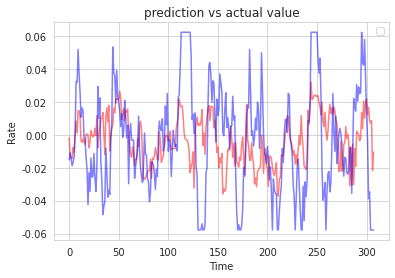

In [ ]:
plt.plot(pred, color='red', alpha=0.5)
plt.plot(y_test,color='blue',alpha=0.5)
plt.title('prediction vs actual value')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()

#### 다음 주 예측

In [ ]:
def predict_data(start, file):
  file_path = f'ohlcv_data/{file}'  # 파일 불러오기
  df = pd.read_csv(file_path)
  df = df[df.Date >= start].reset_index(drop=True)  # 시작하는 날짜보다 뒤에 있는 것만 가져오기
  return df

KINDEX일본Nikkey225_predict = predict_data('2016-03-04', 'KINDEX일본Nikkey225(H).csv')
KINDEX일본Nikkey225_combined_predict = merge_data_set(KINDEX일본Nikkey225_predict, feature_list)
test=KINDEX일본Nikkey225_combined_predict.iloc[-num:]
test.drop(['Date', 'KINDEX일본Nikkey225(H)_Close','KINDEX일본Nikkey225(H)_Volume'],axis=1,inplace=True)

test=scaler.transform(test)
test.shape

(8, 41)

In [ ]:
test=test.reshape(1,num,41)
test=test.mean(axis=1)
pred_KINDEX일본Nikkey225 = lgbm.predict(test)
pred_KINDEX일본Nikkey225=pd.DataFrame({"prediction":pred_KINDEX일본Nikkey225})
pred_KINDEX일본Nikkey225.index = ['KINDEX일본Nikkey225']

pred_KINDEX일본Nikkey225.to_csv('Pred.csv', encoding='utf-8-sig', mode='a', header=False)

### TIGER차이나CSI300

In [ ]:
feature_list = total_feature_list
TIGER차이나CSI300_combined = merge_data_set(TIGER차이나CSI300, feature_list)
TIGER차이나CSI300_combined.tail()

,Date,Open,High,Low,Close,Volume,Rate,gold Price,natural_gas Price,oil Price,...,KOSEF국고채10년_Volume,KBSTAR중기우량회사채_Volume,TIGER원유선물(H)_Volume,TIGER차이나CSI300_Volume,KOSEF미국달러선물_Volume,KINDEX일본Nikkey225(H)_Volume,KODEX인버스_Volume,TIGER코스닥150_Volume,TIGER미국SP500선물(H)_Volume,TIGER단기선진하이일드(H)_Volume
1542,2022-06-13,10455,10580,10380,10435,64700,0.075707,1873.800049,8.950,122.250000,...,9434444,6006,7717,101057,180265,22509,575,64700,3540,1689
1543,2022-06-14,10390,10470,10305,10450,68899,0.084689,1825.500000,8.889,123.680000,...,12194953,390,22270,445573,55982,26010,8907,68899,3241,1397
1544,2022-06-15,10470,10955,10460,10895,216203,0.036714,1839.000000,7.698,119.610001,...,10540450,541,6175,431278,14815,32000,1256,216203,809,1267
1545,2022-06-16,10970,10970,10650,10730,106074,0.071295,1850.599976,8.027,118.080002,...,9186440,4013,5864,305096,30329,30705,754,106074,7534,133
1546,2022-06-17,10610,10865,10580,10865,55885,0.055683,1853.699951,7.588,118.970001,...,7291657,8868,8482,642832,192865,45930,1504,55885,6671,46638


In [ ]:
TIGER차이나CSI300_combined.drop(['Date', 'TIGER차이나CSI300_Close','TIGER차이나CSI300_Volume'], axis=1, inplace=True)

In [ ]:
X = TIGER차이나CSI300_combined.drop('Rate', axis=1)
y = TIGER차이나CSI300_combined[['Rate']]

In [ ]:
X = X.clip(lower=X.quantile(0.05),upper=X.quantile(0.95), axis=1)
y = y.clip(lower=y.quantile(0.05),upper=y.quantile(0.95), axis=1)

In [ ]:
print(f'윈저화된 값: 최소({float(y.min())}), 최대({float(y.max())})')

윈저화된 값: 최소(-0.05378451476430631), 최대(0.060760997541355416)


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[3.60309904e-02, 2.55097291e-02, 2.94846755e-02, ...,
        3.83524623e-01, 7.92893739e-01, 0.00000000e+00],
       [4.51787548e-02, 3.87300996e-02, 4.37575120e-02, ...,
        3.64589714e-01, 1.00000000e+00, 1.00000000e+00],
       [4.70456455e-02, 3.64956708e-02, 8.26322115e-03, ...,
        3.78740755e-01, 2.19866428e-01, 1.00000000e+00],
       ...,
       [7.12778867e-01, 7.90801601e-01, 7.26036659e-01, ...,
        1.32530234e-01, 5.54005082e-02, 3.99489883e-03],
       [8.06123401e-01, 7.93594637e-01, 7.61718750e-01, ...,
        3.93332441e-02, 5.22278224e-01, 3.01888906e-04],
       [7.38915337e-01, 7.74043385e-01, 7.48572716e-01, ...,
        0.00000000e+00, 4.62365143e-01, 1.51751118e-01]])

#### option(사용하면 R2 값이 개선되고, 방향을 더 잘 맞추는 것 같다)
#### 무조건 사용하자!

In [ ]:
num = 9
X_scaled = make_windowed_dataset(X_scaled, num)
X_scaled.shape

(1539, 9, 41)

In [ ]:
X_scaled = X_scaled.mean(axis=1)
X_scaled.shape

(1539, 41)

In [ ]:
y = y.iloc[:-(num-1)].reset_index(drop=True)
y.shape

(1539, 1)

#### train_test_split

In [ ]:
np.random.seed(42)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_scaled,y, test_size=0.2, shuffle=False)

#### LightGBM

In [ ]:
lgbm =LGBMRegressor()
lgbm.fit(X_train, y_train)

LGBMRegressor()

In [ ]:
pred = lgbm.predict(X_test)
y_test = y_test.reset_index(drop=True)
print(f'RMSE: {np.sqrt(mean_squared_error(pred,y_test))}')
print(f'MAE: {mean_absolute_error(pred,y_test)}')
print(f'R2: {r2_score(pred, y_test)}')

RMSE: 0.0365472078609111
MAE: 0.028407285054100437
R2: -6.9330613878417555


No handles with labels found to put in legend.


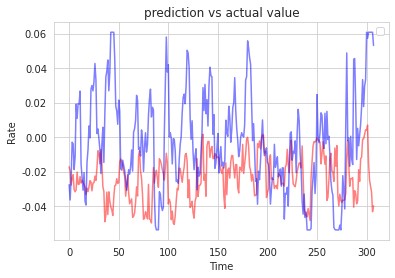

In [ ]:
plt.plot(pred, color='red', alpha=0.5)
plt.plot(y_test,color='blue',alpha=0.5)
plt.title('prediction vs actual value')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()

#### 다음 주 예측

In [ ]:
def predict_data(start, file):
  file_path = f'ohlcv_data/{file}'  # 파일 불러오기
  df = pd.read_csv(file_path)
  df = df[df.Date >= start].reset_index(drop=True)  # 시작하는 날짜보다 뒤에 있는 것만 가져오기
  return df

TIGER차이나CSI300_predict = predict_data('2016-03-04', 'TIGER차이나CSI300.csv')
TIGER차이나CSI300_combined_predict = merge_data_set(TIGER차이나CSI300_predict, feature_list)
test=TIGER차이나CSI300_combined_predict.iloc[-num:]
test.drop(['Date', 'TIGER차이나CSI300_Close','TIGER차이나CSI300_Volume'],axis=1,inplace=True)

test=scaler.transform(test)
test.shape

(9, 41)

In [ ]:
test=test.reshape(1,num,41)
test=test.mean(axis=1)
pred_TIGER차이나CSI300 = lgbm.predict(test)
pred_TIGER차이나CSI300=pd.DataFrame({"prediction":pred_TIGER차이나CSI300})
pred_TIGER차이나CSI300.index = ['TIGER차이나CSI300']

pred_TIGER차이나CSI300.to_csv('Pred.csv', encoding='utf-8-sig', mode='a', header=False)

### TIGER유로스탁스50

In [ ]:
feature_list = total_feature_list
TIGER유로스탁스50_combined = merge_data_set(TIGER유로스탁스50, feature_list)
TIGER유로스탁스50_combined.tail()

,Date,Open,High,Low,Close,Volume,Rate,gold Price,natural_gas Price,oil Price,...,KOSEF국고채10년_Volume,KBSTAR중기우량회사채_Volume,TIGER원유선물(H)_Volume,TIGER차이나CSI300_Volume,KOSEF미국달러선물_Volume,KINDEX일본Nikkey225(H)_Volume,KODEX인버스_Volume,TIGER코스닥150_Volume,TIGER미국SP500선물(H)_Volume,TIGER단기선진하이일드(H)_Volume
1542,2022-06-13,12370,12370,12140,12185,6665,0.004924,1873.800049,8.950,122.250000,...,9434444,6006,7717,101057,180265,22509,575,64700,3540,1689
1543,2022-06-14,12125,12260,12060,12260,17399,0.000816,1825.500000,8.889,123.680000,...,12194953,390,22270,445573,55982,26010,8907,68899,3241,1397
1544,2022-06-15,12120,12165,12010,12165,7611,0.001644,1839.000000,7.698,119.610001,...,10540450,541,6175,431278,14815,32000,1256,216203,809,1267
1545,2022-06-16,12360,12360,12205,12205,7275,-0.022532,1850.599976,8.027,118.080002,...,9186440,4013,5864,305096,30329,30705,754,106074,7534,133
1546,2022-06-17,11855,12000,11780,11925,10548,-0.006289,1853.699951,7.588,118.970001,...,7291657,8868,8482,642832,192865,45930,1504,55885,6671,46638


In [ ]:
TIGER유로스탁스50_combined.drop(['Date', 'TIGER유로스탁스50(H)_Close','TIGER유로스탁스50(H)_Volume'], axis=1, inplace=True)

In [ ]:
X = TIGER유로스탁스50_combined.drop('Rate', axis=1)
y = TIGER유로스탁스50_combined[['Rate']]

In [ ]:
X = X.clip(lower=X.quantile(0.05),upper=X.quantile(0.95), axis=1)
y = y.clip(lower=y.quantile(0.05),upper=y.quantile(0.95), axis=1)

In [ ]:
print(f'윈저화된 값: 최소({float(y.min())}), 최대({float(y.max())})')

윈저화된 값: 최소(-0.05045351263378722), 최대(0.04913063759686636)


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[1.08026358e-02, 9.67741935e-03, 2.67402836e-02, ...,
        3.83524623e-01, 7.92893739e-01, 0.00000000e+00],
       [1.72842173e-02, 8.60215054e-03, 2.56576811e-02, ...,
        3.64589714e-01, 1.00000000e+00, 1.00000000e+00],
       [1.18828994e-02, 6.45161290e-03, 1.15838476e-02, ...,
        3.78740755e-01, 2.19866428e-01, 1.00000000e+00],
       ...,
       [5.43372583e-01, 5.40860215e-01, 5.38811302e-01, ...,
        1.32530234e-01, 5.54005082e-02, 3.99489883e-03],
       [5.95225235e-01, 5.82795699e-01, 5.81032803e-01, ...,
        3.93332441e-02, 5.22278224e-01, 3.01888906e-04],
       [4.86118613e-01, 5.05376344e-01, 4.89011584e-01, ...,
        0.00000000e+00, 4.62365143e-01, 1.51751118e-01]])

#### option(사용하면 R2 값이 개선되고, 방향을 더 잘 맞추는 것 같다)
#### 무조건 사용하자!

In [ ]:
num = 11
X_scaled = make_windowed_dataset(X_scaled, num)
X_scaled.shape

(1537, 11, 41)

In [ ]:
X_scaled = X_scaled.mean(axis=1)
X_scaled.shape

(1537, 41)

In [ ]:
y = y.iloc[:-(num-1)].reset_index(drop=True)
y.shape

(1537, 1)

#### train_test_split

In [ ]:
np.random.seed(42)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_scaled,y, test_size=0.2, shuffle=False)

#### LightGBM

In [ ]:
lgbm =LGBMRegressor()
lgbm.fit(X_train, y_train)

LGBMRegressor()

In [ ]:
pred = lgbm.predict(X_test)
y_test = y_test.reset_index(drop=True)
print(f'RMSE: {np.sqrt(mean_squared_error(pred,y_test))}')
print(f'MAE: {mean_absolute_error(pred,y_test)}')
print(f'R2: {r2_score(pred, y_test)}')

RMSE: 0.027254812998250125
MAE: 0.02175749436465937
R2: -1.786983386355216


No handles with labels found to put in legend.


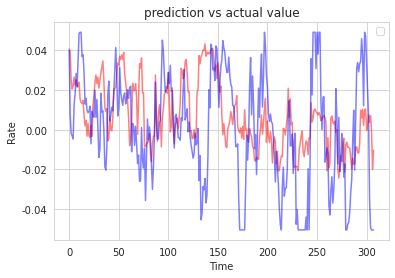

In [ ]:
plt.plot(pred, color='red', alpha=0.5)
plt.plot(y_test,color='blue',alpha=0.5)
plt.title('prediction vs actual value')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()

#### 다음 주 예측

In [ ]:
def predict_data(start, file):
  file_path = f'ohlcv_data/{file}'  # 파일 불러오기
  df = pd.read_csv(file_path)
  df = df[df.Date >= start].reset_index(drop=True)  # 시작하는 날짜보다 뒤에 있는 것만 가져오기
  return df

TIGER유로스탁스50_predict = predict_data('2016-03-04', 'TIGER유로스탁스50(H).csv')
TIGER유로스탁스50_combined_predict = merge_data_set(TIGER유로스탁스50_predict, feature_list)
test=TIGER유로스탁스50_combined_predict.iloc[-num:]
test.drop(['Date', 'TIGER유로스탁스50(H)_Close','TIGER유로스탁스50(H)_Volume'],axis=1,inplace=True)

test=scaler.transform(test)
test.shape

(11, 41)

In [ ]:
test=test.reshape(1,num,41)
test=test.mean(axis=1)
pred_TIGER유로스탁스50 = lgbm.predict(test)
pred_TIGER유로스탁스50=pd.DataFrame({"prediction":pred_TIGER유로스탁스50})
pred_TIGER유로스탁스50.index = ['TIGER유로스탁스50']

pred_TIGER유로스탁스50.to_csv('Pred.csv', encoding='utf-8-sig', mode='a', header=False)

### TIGER미국SP500선물

In [ ]:
feature_list = total_feature_list
TIGER미국SP500선물_combined = merge_data_set(TIGER미국SP500선물, feature_list)
TIGER미국SP500선물_combined.tail()

,Date,Open,High,Low,Close,Volume,Rate,gold Price,natural_gas Price,oil Price,...,KOSEF국고채10년_Volume,KBSTAR중기우량회사채_Volume,TIGER원유선물(H)_Volume,TIGER차이나CSI300_Volume,KOSEF미국달러선물_Volume,KINDEX일본Nikkey225(H)_Volume,KODEX인버스_Volume,TIGER코스닥150_Volume,TIGER미국SP500선물(H)_Volume,TIGER단기선진하이일드(H)_Volume
1542,2022-06-13,45410,45410,44900,44940,180265,0.021807,1873.800049,8.950,122.250000,...,9434444,6006,7717,101057,180265,22509,575,64700,3540,1689
1543,2022-06-14,44185,44690,44145,44645,55982,0.030015,1825.500000,8.889,123.680000,...,12194953,390,22270,445573,55982,26010,8907,68899,3241,1397
1544,2022-06-15,44090,44125,43830,44075,14815,0.018378,1839.000000,7.698,119.610001,...,10540450,541,6175,431278,14815,32000,1256,216203,809,1267
1545,2022-06-16,44795,44940,44230,44230,30329,0.002374,1850.599976,8.027,118.080002,...,9186440,4013,5864,305096,30329,30705,754,106074,7534,133
1546,2022-06-17,43130,44170,43025,43345,192865,0.017418,1853.699951,7.588,118.970001,...,7291657,8868,8482,642832,192865,45930,1504,55885,6671,46638


In [ ]:
TIGER미국SP500선물_combined.drop(['Date', 'TIGER미국SP500선물(H)_Close','TIGER미국SP500선물(H)_Volume'], axis=1, inplace=True)

In [ ]:
X = TIGER미국SP500선물_combined.drop('Rate', axis=1)
y = TIGER미국SP500선물_combined[['Rate']]

In [ ]:
X = X.clip(lower=X.quantile(0.05),upper=X.quantile(0.95), axis=1)
y = y.clip(lower=y.quantile(0.05),upper=y.quantile(0.95), axis=1)

In [ ]:
print(f'윈저화된 값: 최소({float(y.min())}), 최대({float(y.max())})')

윈저화된 값: 최소(-0.052713025029259945), 최대(0.046901965411231296)


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 3.83524623e-01, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        4.58281140e-03, 3.64589714e-01, 1.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 3.78740755e-01, 1.00000000e+00],
       ...,
       [6.86371476e-01, 6.84368632e-01, 6.79555579e-01, ...,
        9.42531545e-02, 1.32530234e-01, 3.99489883e-03],
       [7.11185808e-01, 7.13003303e-01, 6.93641822e-01, ...,
        5.59102991e-02, 3.93332441e-02, 3.01888906e-04],
       [6.52581747e-01, 6.85949687e-01, 6.51207015e-01, ...,
        1.13195442e-01, 0.00000000e+00, 1.51751118e-01]])

#### option(사용하면 R2 값이 개선되고, 방향을 더 잘 맞추는 것 같다)
#### 무조건 사용하자!

In [ ]:
num = 10
X_scaled = make_windowed_dataset(X_scaled, num)
X_scaled.shape

(1538, 10, 41)

In [ ]:
X_scaled = X_scaled.mean(axis=1)
X_scaled.shape

(1538, 41)

In [ ]:
y = y.iloc[:-(num-1)].reset_index(drop=True)
y.shape

(1538, 1)

#### train_test_split

In [ ]:
np.random.seed(42)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_scaled,y, test_size=0.2, shuffle=False)

#### LightGBM

In [ ]:
lgbm =LGBMRegressor()
lgbm.fit(X_train, y_train)

LGBMRegressor()

In [ ]:
pred = lgbm.predict(X_test)
y_test = y_test.reset_index(drop=True)
print(f'RMSE: {np.sqrt(mean_squared_error(pred,y_test))}')
print(f'MAE: {mean_absolute_error(pred,y_test)}')
print(f'R2: {r2_score(pred, y_test)}')

RMSE: 0.024231727989464998
MAE: 0.019814785082679982
R2: -1.2624913316635404


No handles with labels found to put in legend.


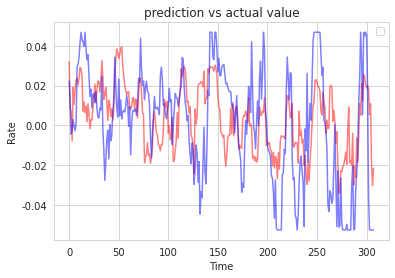

In [ ]:
plt.plot(pred, color='red', alpha=0.5)
plt.plot(y_test,color='blue',alpha=0.5)
plt.title('prediction vs actual value')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()

#### 다음 주 예측

In [ ]:
def predict_data(start, file):
  file_path = f'ohlcv_data/{file}'  # 파일 불러오기
  df = pd.read_csv(file_path)
  df = df[df.Date >= start].reset_index(drop=True)  # 시작하는 날짜보다 뒤에 있는 것만 가져오기
  return df

TIGER미국SP500선물_predict = predict_data('2016-03-04', 'TIGER미국SP500선물(H).csv')
TIGER미국SP500선물_combined_predict = merge_data_set(TIGER미국SP500선물_predict, feature_list)
test=TIGER미국SP500선물_combined_predict.iloc[-num:]
test.drop(['Date', 'TIGER미국SP500선물(H)_Close','TIGER미국SP500선물(H)_Volume'],axis=1,inplace=True)

test=scaler.transform(test)
test.shape

(10, 41)

In [ ]:
test=test.reshape(1,num,41)
test=test.mean(axis=1)
pred_TIGER미국SP500선물 = lgbm.predict(test)
pred_TIGER미국SP500선물=pd.DataFrame({"prediction":pred_TIGER미국SP500선물})
pred_TIGER미국SP500선물.index = ['TIGER미국SP500선물']

pred_TIGER미국SP500선물.to_csv('Pred.csv', encoding='utf-8-sig', mode='a', header=False)

### KODEX골드선물


In [ ]:
feature_list = total_feature_list
KODEX골드선물_combined = merge_data_set(KODEX골드선물, feature_list)
KODEX골드선물_combined.tail()

,Date,Open,High,Low,Close,Volume,Rate,gold Price,natural_gas Price,oil Price,...,KOSEF국고채10년_Volume,KBSTAR중기우량회사채_Volume,TIGER원유선물(H)_Volume,TIGER차이나CSI300_Volume,KOSEF미국달러선물_Volume,KINDEX일본Nikkey225(H)_Volume,KODEX인버스_Volume,TIGER코스닥150_Volume,TIGER미국SP500선물(H)_Volume,TIGER단기선진하이일드(H)_Volume
1542,2022-06-13,12610,12620,12500,12540,253462,-0.016746,1873.800049,8.950,122.250000,...,9434444,6006,7717,101057,180265,22509,575,64700,3540,1689
1543,2022-06-14,12235,12290,12210,12290,187773,-0.001221,1825.500000,8.889,123.680000,...,12194953,390,22270,445573,55982,26010,8907,68899,3241,1397
1544,2022-06-15,12160,12220,12145,12220,156627,0.000000,1839.000000,7.698,119.610001,...,10540450,541,6175,431278,14815,32000,1256,216203,809,1267
1545,2022-06-16,12310,12340,12280,12305,134457,-0.009752,1850.599976,8.027,118.080002,...,9186440,4013,5864,305096,30329,30705,754,106074,7534,133
1546,2022-06-17,12425,12435,12370,12415,97018,-0.028594,1853.699951,7.588,118.970001,...,7291657,8868,8482,642832,192865,45930,1504,55885,6671,46638


In [ ]:
KODEX골드선물_combined.drop(['Date', 'KODEX골드선물(H)_Close','KODEX골드선물(H)_Volume'], axis=1, inplace=True)

In [ ]:
X = KODEX골드선물_combined.drop('Rate', axis=1)
y = KODEX골드선물_combined[['Rate']]

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-6.98556516e-01, -6.96366889e-01, -6.95688977e-01, ...,
         5.27197459e-02,  6.41635199e-02, -2.91150838e-01],
       [-6.77769663e-01, -6.72226479e-01, -6.88731840e-01, ...,
        -8.01204842e-04,  1.70214086e+00,  3.14499860e+00],
       [-6.67376236e-01, -6.54983329e-01, -6.53946155e-01, ...,
         3.91977823e-02, -6.72631837e-02,  3.46014902e+00],
       ...,
       [ 9.88643078e-01,  1.00380768e+00,  1.00533105e+00, ...,
        -6.56734841e-01, -1.04984272e-01, -2.77323275e-01],
       [ 1.09257735e+00,  1.08657480e+00,  1.09925240e+00, ...,
        -9.20163166e-01,  2.09648688e-03, -2.89948441e-01],
       [ 1.17226028e+00,  1.15209877e+00,  1.16186663e+00, ...,
        -1.04021514e+00, -1.16448804e-02,  2.27805845e-01]])

#### option(사용하면 R2 값이 개선되고, 방향을 더 잘 맞추는 것 같다)
#### 무조건 사용하자!

In [ ]:
num = 6
X_scaled = make_windowed_dataset(X_scaled, num)
X_scaled.shape

(1542, 6, 41)

In [ ]:
X_scaled = X_scaled.mean(axis=1)
X_scaled.shape

(1542, 41)

In [ ]:
y = y.iloc[:-(num-1)].reset_index(drop=True)
y.shape

(1542, 1)

#### train_test_split

In [ ]:
np.random.seed(42)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_scaled,y, test_size=0.2, shuffle=False)

#### LightGBM

In [ ]:
lgbm =LGBMRegressor()
lgbm.fit(X_train, y_train)

LGBMRegressor()

In [ ]:
pred = lgbm.predict(X_test)
y_test = y_test.reset_index(drop=True)
print(f'RMSE: {np.sqrt(mean_squared_error(pred,y_test))}')
print(f'MAE: {mean_absolute_error(pred,y_test)}')
print(f'R2: {r2_score(pred, y_test)}')

RMSE: 0.03149052499552594
MAE: 0.02541449476544902
R2: -3.8671560107866325


No handles with labels found to put in legend.


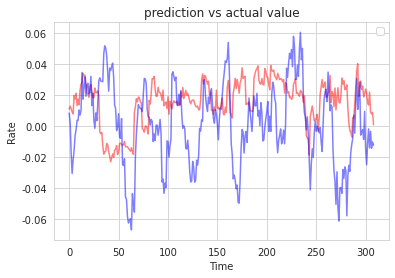

In [ ]:
plt.plot(pred, color='red', alpha=0.5)
plt.plot(y_test,color='blue',alpha=0.5)
plt.title('prediction vs actual value')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()

#### 다음 주 예측

In [ ]:
def predict_data(start, file):
  file_path = f'ohlcv_data/{file}'  # 파일 불러오기
  df = pd.read_csv(file_path)
  df = df[df.Date >= start].reset_index(drop=True)  # 시작하는 날짜보다 뒤에 있는 것만 가져오기
  return df

KODEX골드선물_predict = predict_data('2016-03-04', 'KODEX골드선물(H).csv')
KODEX골드선물_combined_predict = merge_data_set(KODEX골드선물_predict, feature_list)
test=KODEX골드선물_combined_predict.iloc[-num:]
test.drop(['Date', 'KODEX골드선물(H)_Close','KODEX골드선물(H)_Volume'],axis=1,inplace=True)

test=scaler.transform(test)
test.shape

(6, 41)

In [ ]:
test=test.reshape(1,num,41)
test=test.mean(axis=1)
pred_KODEX골드선물 = lgbm.predict(test)
pred_KODEX골드선물=pd.DataFrame({"prediction":pred_KODEX골드선물})
pred_KODEX골드선물.index = ['KODEX골드선물']

pred_KODEX골드선물.to_csv('Pred.csv', encoding='utf-8-sig', mode='a', header=False)

### TIGER원유선물

In [ ]:
feature_list = total_feature_list
TIGER원유선물_combined = merge_data_set(TIGER원유선물, feature_list)
TIGER원유선물_combined.tail()

,Date,Open,High,Low,Close,Volume,Rate,gold Price,natural_gas Price,oil Price,...,KOSEF국고채10년_Volume,KBSTAR중기우량회사채_Volume,TIGER원유선물(H)_Volume,TIGER차이나CSI300_Volume,KOSEF미국달러선물_Volume,KINDEX일본Nikkey225(H)_Volume,KODEX인버스_Volume,TIGER코스닥150_Volume,TIGER미국SP500선물(H)_Volume,TIGER단기선진하이일드(H)_Volume
1542,2022-06-13,6010,6015,5965,5975,101057,-0.070293,1873.800049,8.950,122.250000,...,9434444,6006,7717,101057,180265,22509,575,64700,3540,1689
1543,2022-06-14,6080,6150,6070,6150,445573,-0.066667,1825.500000,8.889,123.680000,...,12194953,390,22270,445573,55982,26010,8907,68899,3241,1397
1544,2022-06-15,5970,6030,5965,6015,431278,-0.041563,1839.000000,7.698,119.610001,...,10540450,541,6175,431278,14815,32000,1256,216203,809,1267
1545,2022-06-16,5910,5935,5870,5900,305096,-0.038136,1850.599976,8.027,118.080002,...,9186440,4013,5864,305096,30329,30705,754,106074,7534,133
1546,2022-06-17,5930,5950,5895,5950,642832,-0.084874,1853.699951,7.588,118.970001,...,7291657,8868,8482,642832,192865,45930,1504,55885,6671,46638


In [ ]:
TIGER원유선물_combined.drop(['Date', 'TIGER원유선물(H)_Close','TIGER원유선물(H)_Volume'], axis=1, inplace=True)

In [ ]:
X = TIGER원유선물_combined.drop('Rate', axis=1)
y = TIGER원유선물_combined[['Rate']]

In [ ]:
X = X.clip(lower=X.quantile(0.05),upper=X.quantile(0.95), axis=1)
y = y.clip(lower=y.quantile(0.05),upper=y.quantile(0.95), axis=1)

In [ ]:
print(f'윈저화된 값: 최소({float(y.min())}), 최대({float(y.max())})')

윈저화된 값: 최소(-0.10329998280900814), 최대(0.10048232707467568)


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[4.94975251e-01, 4.96718377e-01, 4.98493976e-01, ...,
        3.83524623e-01, 7.92893739e-01, 0.00000000e+00],
       [5.36973151e-01, 5.47434368e-01, 5.40662651e-01, ...,
        3.64589714e-01, 1.00000000e+00, 1.00000000e+00],
       [5.80470976e-01, 5.77267303e-01, 5.63253012e-01, ...,
        3.78740755e-01, 2.19866428e-01, 1.00000000e+00],
       ...,
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        1.32530234e-01, 5.54005082e-02, 3.99489883e-03],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        3.93332441e-02, 5.22278224e-01, 3.01888906e-04],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 4.62365143e-01, 1.51751118e-01]])

#### option(사용하면 R2 값이 개선되고, 방향을 더 잘 맞추는 것 같다)
#### 무조건 사용하자!

In [ ]:
num = 8
X_scaled = make_windowed_dataset(X_scaled, num)
X_scaled.shape

(1540, 8, 41)

In [ ]:
X_scaled = X_scaled.mean(axis=1)
X_scaled.shape

(1540, 41)

In [ ]:
y = y.iloc[:-(num-1)].reset_index(drop=True)
y.shape

(1540, 1)

#### train_test_split

In [ ]:
np.random.seed(42)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_scaled,y, test_size=0.2, shuffle=False)

#### LightGBM

In [ ]:
lgbm =LGBMRegressor()
lgbm.fit(X_train, y_train)

LGBMRegressor()

In [ ]:
pred = lgbm.predict(X_test)
y_test = y_test.reset_index(drop=True)
print(f'RMSE: {np.sqrt(mean_squared_error(pred,y_test))}')
print(f'MAE: {mean_absolute_error(pred,y_test)}')
print(f'R2: {r2_score(pred, y_test)}')

RMSE: 0.07710570408345684
MAE: 0.06579163785817815
R2: -11.719567645851104


No handles with labels found to put in legend.


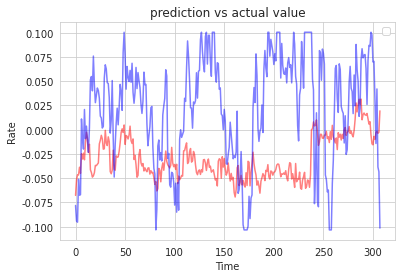

In [ ]:
plt.plot(pred, color='red', alpha=0.5)
plt.plot(y_test,color='blue',alpha=0.5)
plt.title('prediction vs actual value')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()

#### 다음 주 예측

In [ ]:
def predict_data(start, file):
  file_path = f'ohlcv_data/{file}'  # 파일 불러오기
  df = pd.read_csv(file_path)
  df = df[df.Date >= start].reset_index(drop=True)  # 시작하는 날짜보다 뒤에 있는 것만 가져오기
  return df

TIGER원유선물_predict = predict_data('2016-03-04', 'TIGER원유선물(H).csv')
TIGER원유선물_combined_predict = merge_data_set(TIGER원유선물_predict, feature_list)
test=TIGER원유선물_combined_predict.iloc[-num:]
test.drop(['Date', 'TIGER원유선물(H)_Close','TIGER원유선물(H)_Volume'],axis=1,inplace=True)

test=scaler.transform(test)
test.shape

(8, 41)

In [ ]:
test=test.reshape(1,num,41)
test=test.mean(axis=1)
pred_TIGER원유선물 = lgbm.predict(test)
pred_TIGER원유선물=pd.DataFrame({"prediction":pred_TIGER원유선물})
pred_TIGER원유선물.index = ['TIGER원유선물']

pred_TIGER원유선물.to_csv('Pred.csv', encoding='utf-8-sig', mode='a', header=False)

### KOSEF미국달러선물


In [ ]:
feature_list = total_feature_list
KOSEF미국달러선물_combined = merge_data_set(KOSEF미국달러선물, feature_list)
KOSEF미국달러선물_combined.tail()

,Date,Open,High,Low,Close,Volume,Rate,gold Price,natural_gas Price,oil Price,...,KOSEF국고채10년_Volume,KBSTAR중기우량회사채_Volume,TIGER원유선물(H)_Volume,TIGER차이나CSI300_Volume,KOSEF미국달러선물_Volume,KINDEX일본Nikkey225(H)_Volume,KODEX인버스_Volume,TIGER코스닥150_Volume,TIGER미국SP500선물(H)_Volume,TIGER단기선진하이일드(H)_Volume
1542,2022-06-13,13410,13500,13410,13465,7717,0.002228,1873.800049,8.950,122.250000,...,9434444,6006,7717,101057,180265,22509,575,64700,3540,1689
1543,2022-06-14,13535,13545,13480,13495,22270,-0.002964,1825.500000,8.889,123.680000,...,12194953,390,22270,445573,55982,26010,8907,68899,3241,1397
1544,2022-06-15,13525,13555,13500,13540,6175,0.007016,1839.000000,7.698,119.610001,...,10540450,541,6175,431278,14815,32000,1256,216203,809,1267
1545,2022-06-16,13430,13505,13375,13500,5864,0.009630,1850.599976,8.027,118.080002,...,9186440,4013,5864,305096,30329,30705,754,106074,7534,133
1546,2022-06-17,13530,13540,13455,13505,8482,0.008145,1853.699951,7.588,118.970001,...,7291657,8868,8482,642832,192865,45930,1504,55885,6671,46638


In [ ]:
KOSEF미국달러선물_combined.drop(['Date', 'KOSEF미국달러선물_Close','KOSEF미국달러선물_Volume'], axis=1, inplace=True)

In [ ]:
X = KOSEF미국달러선물_combined.drop('Rate', axis=1)
y = KOSEF미국달러선물_combined[['Rate']]

In [ ]:
X = X.clip(lower=X.quantile(0.05),upper=X.quantile(0.95), axis=1)
y = y.clip(lower=y.quantile(0.05),upper=y.quantile(0.95), axis=1)

In [ ]:
print(f'윈저화된 값: 최소({float(y.min())}), 최대({float(y.max())})')

윈저화된 값: 최소(-0.022664509520692412), 최대(0.026603661496421366)


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.36428175,  0.39766022,  0.31416487, ...,  0.15640163,
         2.30297467, -0.30514507],
       [ 0.14039339,  0.20751957,  0.19770509, ...,  0.08533934,
         3.07330988,  3.75294519],
       [ 0.19033772,  0.26576085,  0.18914187, ...,  0.13844788,
         0.17158997,  3.75294519],
       ...,
       [ 1.81800605,  1.84427081,  1.81392715, ..., -0.7855747 ,
        -0.44014378, -0.28893341],
       [ 1.81800605,  1.84427081,  1.81392715, ..., -1.13534092,
         1.29641572, -0.30391998],
       [ 1.81800605,  1.84427081,  1.81392715, ..., -1.2829577 ,
         1.07356801,  0.31067466]])

#### option(사용하면 R2 값이 개선되고, 방향을 더 잘 맞추는 것 같다)
#### 무조건 사용하자!

In [ ]:
num = 8
X_scaled = make_windowed_dataset(X_scaled, num)
X_scaled.shape

(1540, 8, 41)

In [ ]:
X_scaled = X_scaled.mean(axis=1)
X_scaled.shape

(1540, 41)

In [ ]:
y = y.iloc[:-(num-1)].reset_index(drop=True)
y.shape

(1540, 1)

#### train_test_split

In [ ]:
np.random.seed(42)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_scaled,y, test_size=0.2, shuffle=False)

#### LightGBM

In [ ]:
lgbm =LGBMRegressor()
lgbm.fit(X_train, y_train)

LGBMRegressor()

In [ ]:
pred = lgbm.predict(X_test)
y_test = y_test.reset_index(drop=True)
print(f'RMSE: {np.sqrt(mean_squared_error(pred,y_test))}')
print(f'MAE: {mean_absolute_error(pred,y_test)}')
print(f'R2: {r2_score(pred, y_test)}')

RMSE: 0.008779291855518444
MAE: 0.006869761771463489
R2: 0.13469459822220475


No handles with labels found to put in legend.


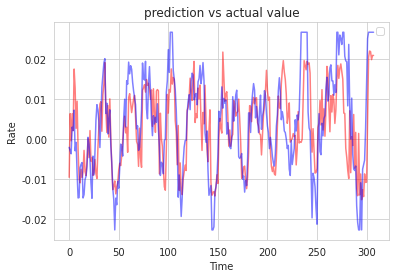

In [ ]:
plt.plot(pred, color='red', alpha=0.5)
plt.plot(y_test,color='blue',alpha=0.5)
plt.title('prediction vs actual value')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()

#### 다음 주 예측

In [ ]:
def predict_data(start, file):
  file_path = f'ohlcv_data/{file}'  # 파일 불러오기
  df = pd.read_csv(file_path)
  df = df[df.Date >= start].reset_index(drop=True)  # 시작하는 날짜보다 뒤에 있는 것만 가져오기
  return df

KOSEF미국달러선물_predict = predict_data('2016-03-04', 'KOSEF미국달러선물.csv')
KOSEF미국달러선물_combined_predict = merge_data_set(KOSEF미국달러선물_predict, feature_list)
test=KOSEF미국달러선물_combined_predict.iloc[-num:]
test.drop(['Date', 'KOSEF미국달러선물_Close','KOSEF미국달러선물_Volume'],axis=1,inplace=True)

test=scaler.transform(test)
test.shape

(8, 41)

In [ ]:
test=test.reshape(1,num,41)
test=test.mean(axis=1)
pred_KOSEF미국달러선물 = lgbm.predict(test)
pred_KOSEF미국달러선물=pd.DataFrame({"prediction":pred_KOSEF미국달러선물})
pred_KOSEF미국달러선물.index = ['KOSEF미국달러선물']

pred_KOSEF미국달러선물.to_csv('Pred.csv', encoding='utf-8-sig', mode='a', header=False)

### KOSEF미국달러선물인버스


In [ ]:
feature_list = total_feature_list
KOSEF미국달러선물인버스_combined = merge_data_set(KOSEF미국달러선물인버스, feature_list)
KOSEF미국달러선물인버스_combined.tail()

,Date,Open,High,Low,Close,Volume,Rate,gold Price,natural_gas Price,oil Price,...,KOSEF국고채10년_Volume,KBSTAR중기우량회사채_Volume,TIGER원유선물(H)_Volume,TIGER차이나CSI300_Volume,KOSEF미국달러선물_Volume,KINDEX일본Nikkey225(H)_Volume,KODEX인버스_Volume,TIGER코스닥150_Volume,TIGER미국SP500선물(H)_Volume,TIGER단기선진하이일드(H)_Volume
1542,2022-06-13,9300,9300,9260,9295,3540,-0.001614,1873.800049,8.950,122.250000,...,9434444,6006,7717,101057,180265,22509,575,64700,3540,1689
1543,2022-06-14,9250,9285,9230,9285,3241,0.001616,1825.500000,8.889,123.680000,...,12194953,390,22270,445573,55982,26010,8907,68899,3241,1397
1544,2022-06-15,9245,9265,9230,9250,809,-0.007027,1839.000000,7.698,119.610001,...,10540450,541,6175,431278,14815,32000,1256,216203,809,1267
1545,2022-06-16,9345,9345,9265,9275,7534,-0.009704,1850.599976,8.027,118.080002,...,9186440,4013,5864,305096,30329,30705,754,106074,7534,133
1546,2022-06-17,9265,9305,9245,9270,6671,-0.008630,1853.699951,7.588,118.970001,...,7291657,8868,8482,642832,192865,45930,1504,55885,6671,46638


In [ ]:
KOSEF미국달러선물인버스_combined.drop(['Date', 'KOSEF미국달러선물인버스_Close','KOSEF미국달러선물인버스_Volume'], axis=1, inplace=True)

In [ ]:
X = KOSEF미국달러선물인버스_combined.drop('Rate', axis=1)
y = KOSEF미국달러선물인버스_combined[['Rate']]

In [ ]:
X = X.clip(lower=X.quantile(0.05),upper=X.quantile(0.95), axis=1)
y = y.clip(lower=y.quantile(0.05),upper=y.quantile(0.95), axis=1)

In [ ]:
print(f'윈저화된 값: 최소({float(y.min())}), 최대({float(y.max())})')

윈저화된 값: 최소(-0.02623214812973017), 최대(0.022541765073272376)


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.71104032, -0.56459615, -0.66826197, ...,  0.15640163,
         2.30297467, -0.30514507],
       [-0.47070835, -0.47474118, -0.48525591, ...,  0.08533934,
         3.07330988,  3.75294519],
       [-0.48072219, -0.52466061, -0.55642493, ...,  0.13844788,
         0.17158997,  3.75294519],
       ...,
       [-1.742465  , -1.74269465, -1.74596437, ..., -0.7855747 ,
        -0.44014378, -0.28893341],
       [-1.742465  , -1.74269465, -1.74596437, ..., -1.13534092,
         1.29641572, -0.30391998],
       [-1.742465  , -1.74269465, -1.74596437, ..., -1.2829577 ,
         1.07356801,  0.31067466]])

#### option(사용하면 R2 값이 개선되고, 방향을 더 잘 맞추는 것 같다)
#### 무조건 사용하자!

In [ ]:
num = 8
X_scaled = make_windowed_dataset(X_scaled, num)
X_scaled.shape

(1540, 8, 41)

In [ ]:
X_scaled = X_scaled.mean(axis=1)
X_scaled.shape

(1540, 41)

In [ ]:
y = y.iloc[:-(num-1)].reset_index(drop=True)
y.shape

(1540, 1)

#### train_test_split

In [ ]:
np.random.seed(42)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_scaled,y, test_size=0.2, shuffle=False)

#### LightGBM

In [ ]:
lgbm =LGBMRegressor()
lgbm.fit(X_train, y_train)

LGBMRegressor()

In [ ]:
pred = lgbm.predict(X_test)
y_test = y_test.reset_index(drop=True)
print(f'RMSE: {np.sqrt(mean_squared_error(pred,y_test))}')
print(f'MAE: {mean_absolute_error(pred,y_test)}')
print(f'R2: {r2_score(pred, y_test)}')

RMSE: 0.009205785021962764
MAE: 0.007527261673567652
R2: 0.021678104763700023


No handles with labels found to put in legend.


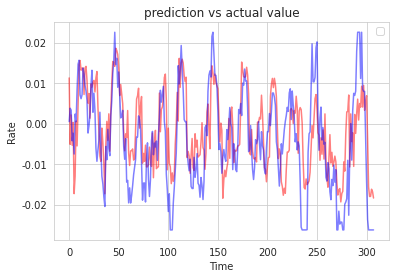

In [ ]:
plt.plot(pred, color='red', alpha=0.5)
plt.plot(y_test,color='blue',alpha=0.5)
plt.title('prediction vs actual value')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()

#### 다음 주 예측

In [ ]:
def predict_data(start, file):
  file_path = f'ohlcv_data/{file}'  # 파일 불러오기
  df = pd.read_csv(file_path)
  df = df[df.Date >= start].reset_index(drop=True)  # 시작하는 날짜보다 뒤에 있는 것만 가져오기
  return df

KOSEF미국달러선물인버스_predict = predict_data('2016-03-04', 'KOSEF미국달러선물인버스.csv')
KOSEF미국달러선물인버스_combined_predict = merge_data_set(KOSEF미국달러선물인버스_predict, feature_list)
test=KOSEF미국달러선물인버스_combined_predict.iloc[-num:]
test.drop(['Date', 'KOSEF미국달러선물인버스_Close','KOSEF미국달러선물인버스_Volume'],axis=1,inplace=True)

test=scaler.transform(test)
test.shape

(8, 41)

In [ ]:
test=test.reshape(1,num,41)
test=test.mean(axis=1)
pred_KOSEF미국달러선물인버스 = lgbm.predict(test)
pred_KOSEF미국달러선물인버스=pd.DataFrame({"prediction":pred_KOSEF미국달러선물인버스})
pred_KOSEF미국달러선물인버스.index = ['KOSEF미국달러선물인버스']

pred_KOSEF미국달러선물인버스.to_csv('Pred.csv', encoding='utf-8-sig', mode='a', header=False)

### KOSEF국고채10년


In [ ]:
feature_list = total_feature_list
KOSEF국고채10년_combined = merge_data_set(KOSEF국고채10년, feature_list)
KOSEF국고채10년_combined.tail()

,Date,Open,High,Low,Close,Volume,Rate,gold Price,natural_gas Price,oil Price,...,KOSEF국고채10년_Volume,KBSTAR중기우량회사채_Volume,TIGER원유선물(H)_Volume,TIGER차이나CSI300_Volume,KOSEF미국달러선물_Volume,KINDEX일본Nikkey225(H)_Volume,KODEX인버스_Volume,TIGER코스닥150_Volume,TIGER미국SP500선물(H)_Volume,TIGER단기선진하이일드(H)_Volume
1542,2022-06-13,108565,108800,107410,107980,22509,-0.004492,1873.800049,8.950,122.250000,...,9434444,6006,7717,101057,180265,22509,575,64700,3540,1689
1543,2022-06-14,107000,107800,106360,107800,26010,0.001855,1825.500000,8.889,123.680000,...,12194953,390,22270,445573,55982,26010,8907,68899,3241,1397
1544,2022-06-15,107800,110230,106585,106660,32000,0.011907,1839.000000,7.698,119.610001,...,10540450,541,6175,431278,14815,32000,1256,216203,809,1267
1545,2022-06-16,107695,108020,106960,107040,30705,0.009249,1850.599976,8.027,118.080002,...,9186440,4013,5864,305096,30329,30705,754,106074,7534,133
1546,2022-06-17,106775,106980,106330,106595,45930,0.027112,1853.699951,7.588,118.970001,...,7291657,8868,8482,642832,192865,45930,1504,55885,6671,46638


In [ ]:
KOSEF국고채10년_combined.drop(['Date', 'KOSEF국고채10년_Close','KOSEF국고채10년_Volume'], axis=1, inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(KOSEF국고채10년_combined, test_size=0.2, shuffle=False)

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler_1 = MinMaxScaler()
scaler_target = MinMaxScaler()

train[train.columns.drop('Rate')] = scaler_1.fit_transform(train[train.columns.drop('Rate')])
test[train.columns.drop('Rate')] = scaler_1.transform(test[train.columns.drop('Rate')])

train[['Rate']] = scaler_target.fit_transform(train[['Rate']])
test[['Rate']] = scaler_target.transform(test[['Rate']])

In [ ]:
# Creating a data structure with n timesteps and 1 output
time_step = 8
y = train.Rate
train.drop('Rate', axis=1, inplace=True)
X_train = []
y_train = []
for i in range(time_step,len(train)):
  X_train.append(train.iloc[i-time_step:i,])
  y_train.append(y.iloc[i-time_step])
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 41))
X_train.shape

(1229, 8, 41)

#### Using pretrained model

In [ ]:
# Importing the Keras libraries and packages
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, BatchNormalization
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

In [ ]:
regressor = tf.keras.models.load_model('국고채model.h5')

In [ ]:
# preprocessing the test dataset
# Creating a data structure with n timesteps
# 이전에 지정해주었던 test를 y_test로 사용하기로 한다.(Scaling은 되어 있음)
y_test = np.reshape(np.array(test.iloc[:,5]), (-1,1))
test.drop('Rate', axis=1, inplace=True)
total_data = np.concatenate([train, test], axis=0)

X_test = []
for i in range(len(total_data)-len(test), len(total_data)):
  X_test.append(total_data[i-time_step:i,:])
X_test = np.array(X_test)

# Reshaping
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 41))
X_test.shape

print(f"shape of X_test: {X_test.shape}")
print(f"shape of y_test: {y_test.shape}")

shape of X_test: (310, 8, 41)
shape of y_test: (310, 1)


In [ ]:
real = y_test
pred= regressor.predict(X_test)
real = scaler_target.inverse_transform(real)
pred = scaler_target.inverse_transform(pred)

print(f'RMSE: {np.sqrt(mean_squared_error(pred,real))}')
print(f'MAE: {mean_absolute_error(pred,real)}')
print(f'R2: {r2_score(pred, real)}')

RMSE: 0.016545350385595535
MAE: 0.01267414691365713
R2: -1.0578362652682527


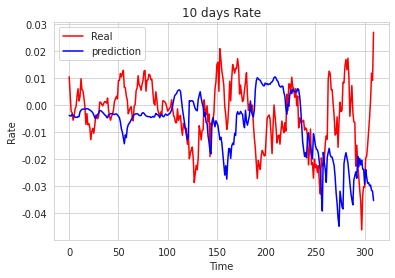

In [ ]:
# Visualising the results
plt.plot(real, color = 'red', label = 'Real')
plt.plot(pred, color = 'blue', label = 'prediction')
plt.title('10 days Rate')
plt.xlabel('Time')
plt.ylabel("Rate")
plt.legend(loc='best')
plt.show()

#### 다음 주 예측

In [ ]:
def predict_data(start, file):
  file_path = f'ohlcv_data/{file}'  # 파일 불러오기
  df = pd.read_csv(file_path)
  df = df[df.Date >= start].reset_index(drop=True)  # 시작하는 날짜보다 뒤에 있는 것만 가져오기
  return df

KOSEF국고채10년_predict = predict_data('2016-03-04', 'KOSEF국고채10년.csv')
KOSEF국고채10년_combined_predict = merge_data_set(KOSEF국고채10년_predict, feature_list)
test=KOSEF국고채10년_combined_predict.iloc[-time_step:]
test.drop(['Date', 'KOSEF국고채10년_Close','KOSEF국고채10년_Volume'],axis=1,inplace=True)

test=scaler_1.transform(test)
test.shape

(8, 41)

In [ ]:
test=test.reshape(1,time_step,41)
pred_KOSEF국고채10년 = regressor.predict(test)
pred_KOSEF국고채10년 = scaler_target.inverse_transform(pred_KOSEF국고채10년)[0]
pred_KOSEF국고채10년=pd.DataFrame({"prediction":pred_KOSEF국고채10년})
pred_KOSEF국고채10년.index = ['KOSEF국고채10년']

pred_KOSEF국고채10년.to_csv('Pred.csv', encoding='utf-8-sig', mode='a', header=False)

### KBSTAR중기우량회사채

In [ ]:
feature_list = total_feature_list
KBSTAR중기우량회사채_combined = merge_data_set(KBSTAR중기우량회사채, feature_list)
KBSTAR중기우량회사채_combined.tail()

,Date,Open,High,Low,Close,Volume,Rate,gold Price,natural_gas Price,oil Price,...,KOSEF국고채10년_Volume,KBSTAR중기우량회사채_Volume,TIGER원유선물(H)_Volume,TIGER차이나CSI300_Volume,KOSEF미국달러선물_Volume,KINDEX일본Nikkey225(H)_Volume,KODEX인버스_Volume,TIGER코스닥150_Volume,TIGER미국SP500선물(H)_Volume,TIGER단기선진하이일드(H)_Volume
1542,2022-06-13,101455,102230,101455,101785,575,-0.005502,1873.800049,8.950,122.250000,...,9434444,6006,7717,101057,180265,22509,575,64700,3540,1689
1543,2022-06-14,101520,101520,101335,101475,8907,-0.001577,1825.500000,8.889,123.680000,...,12194953,390,22270,445573,55982,26010,8907,68899,3241,1397
1544,2022-06-15,101450,101550,101255,101275,1256,-0.000346,1839.000000,7.698,119.610001,...,10540450,541,6175,431278,14815,32000,1256,216203,809,1267
1545,2022-06-16,101325,101450,101175,101175,754,0.001433,1850.599976,8.027,118.080002,...,9186440,4013,5864,305096,30329,30705,754,106074,7534,133
1546,2022-06-17,101080,101090,100960,101000,1504,0.005198,1853.699951,7.588,118.970001,...,7291657,8868,8482,642832,192865,45930,1504,55885,6671,46638


In [ ]:
KBSTAR중기우량회사채_combined.drop(['Date', 'KBSTAR중기우량회사채_Close','KBSTAR중기우량회사채_Volume'], axis=1, inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(KBSTAR중기우량회사채_combined, test_size=0.2, shuffle=False)

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler_1 = MinMaxScaler()
scaler_target = MinMaxScaler()

train[train.columns.drop('Rate')] = scaler_1.fit_transform(train[train.columns.drop('Rate')])
test[train.columns.drop('Rate')] = scaler_1.transform(test[train.columns.drop('Rate')])

train[['Rate']] = scaler_target.fit_transform(train[['Rate']])
test[['Rate']] = scaler_target.transform(test[['Rate']])

In [ ]:
# Creating a data structure with n timesteps and 1 output
time_step = 30
y = train.Rate
train.drop('Rate', axis=1, inplace=True)
X_train = []
y_train = []
for i in range(time_step,len(train)):
  X_train.append(train.iloc[i-time_step:i,])
  y_train.append(y.iloc[i-time_step])
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 41))
X_train.shape

(1207, 30, 41)

#### Using pretrained model

In [ ]:
regressor = tf.keras.models.load_model('중기우량회사채.h5')

In [ ]:
# preprocessing the test dataset
# Creating a data structure with n timesteps
# 이전에 지정해주었던 test를 y_test로 사용하기로 한다.(Scaling은 되어 있음)
y_test = np.reshape(np.array(test.iloc[:,5]), (-1,1))
test.drop('Rate', axis=1, inplace=True)
total_data = np.concatenate([train, test], axis=0)

X_test = []
for i in range(len(total_data)-len(test), len(total_data)):
  X_test.append(total_data[i-time_step:i,:])
X_test = np.array(X_test)

# Reshaping
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 41))
X_test.shape

print(f"shape of X_test: {X_test.shape}")
print(f"shape of y_test: {y_test.shape}")

shape of X_test: (310, 30, 41)
shape of y_test: (310, 1)


In [ ]:
real = y_test
pred= regressor.predict(X_test)
real = scaler_target.inverse_transform(real)
pred = scaler_target.inverse_transform(pred)

print(f'RMSE: {np.sqrt(mean_squared_error(pred,real))}')
print(f'MAE: {mean_absolute_error(pred,real)}')
print(f'R2: {r2_score(pred, real)}')

RMSE: 0.00421500098487506
MAE: 0.003256677217094556
R2: -13.901923397338603


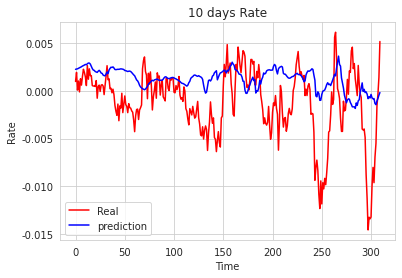

In [ ]:
# Visualising the results
plt.plot(real, color = 'red', label = 'Real')
plt.plot(pred, color = 'blue', label = 'prediction')
plt.title('10 days Rate')
plt.xlabel('Time')
plt.ylabel("Rate")
plt.legend(loc='best')
plt.show()

#### 다음 주 예측

In [ ]:
def predict_data(start, file):
  file_path = f'ohlcv_data/{file}'  # 파일 불러오기
  df = pd.read_csv(file_path)
  df = df[df.Date >= start].reset_index(drop=True)  # 시작하는 날짜보다 뒤에 있는 것만 가져오기
  return df

KBSTAR중기우량회사채_predict = predict_data('2016-03-04', 'KBSTAR중기우량회사채.csv')
KBSTAR중기우량회사채_combined_predict = merge_data_set(KBSTAR중기우량회사채_predict, feature_list)
test=KBSTAR중기우량회사채_combined_predict.iloc[-time_step:,:]
test.drop(['Date', 'KOSEF국고채10년_Close','KOSEF국고채10년_Volume'],axis=1,inplace=True)

test=scaler_1.transform(test)
test.shape

(30, 41)

In [ ]:
test=test.reshape(1,time_step,41)
pred_KBSTAR중기우량회사채 = regressor.predict(test)
pred_KBSTAR중기우량회사채 = scaler_target.inverse_transform(pred_KBSTAR중기우량회사채)[0]
pred_KBSTAR중기우량회사채=pd.DataFrame({"prediction":pred_KBSTAR중기우량회사채})
pred_KBSTAR중기우량회사채.index = ['KBSTAR중기우량회사채']

pred_KBSTAR중기우량회사채.to_csv('Pred.csv', encoding='utf-8-sig', mode='a', header=False)

### TIGER단기선진하이일드


In [ ]:
feature_list = total_feature_list
TIGER단기선진하이일드_combined = merge_data_set(TIGER단기선진하이일드, feature_list)
TIGER단기선진하이일드_combined.tail()

,Date,Open,High,Low,Close,Volume,Rate,gold Price,natural_gas Price,oil Price,...,KOSEF국고채10년_Volume,KBSTAR중기우량회사채_Volume,TIGER원유선물(H)_Volume,TIGER차이나CSI300_Volume,KOSEF미국달러선물_Volume,KINDEX일본Nikkey225(H)_Volume,KODEX인버스_Volume,TIGER코스닥150_Volume,TIGER미국SP500선물(H)_Volume,TIGER단기선진하이일드(H)_Volume
1542,2022-06-13,11820,11820,11755,11755,770,-0.016163,1873.800049,8.950,122.250000,...,9434444,6006,7717,101057,180265,22509,575,64700,3540,1689
1543,2022-06-14,11555,11555,11510,11555,74,0.002164,1825.500000,8.889,123.680000,...,12194953,390,22270,445573,55982,26010,8907,68899,3241,1397
1544,2022-06-15,11485,11550,11485,11495,295,0.003915,1839.000000,7.698,119.610001,...,10540450,541,6175,431278,14815,32000,1256,216203,809,1267
1545,2022-06-16,11580,11615,11575,11615,398,-0.013345,1850.599976,8.027,118.080002,...,9186440,4013,5864,305096,30329,30705,754,106074,7534,133
1546,2022-06-17,11525,11525,11465,11525,17,-0.008243,1853.699951,7.588,118.970001,...,7291657,8868,8482,642832,192865,45930,1504,55885,6671,46638


In [ ]:
TIGER단기선진하이일드_combined.drop(['Date', 'TIGER단기선진하이일드(H)_Close','TIGER단기선진하이일드(H)_Volume'], axis=1, inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(KOSEF국고채10년_combined, test_size=0.2, shuffle=False)

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler_1 = MinMaxScaler()
scaler_target = MinMaxScaler()

train[train.columns.drop('Rate')] = scaler_1.fit_transform(train[train.columns.drop('Rate')])
test[train.columns.drop('Rate')] = scaler_1.transform(test[train.columns.drop('Rate')])

train[['Rate']] = scaler_target.fit_transform(train[['Rate']])
test[['Rate']] = scaler_target.transform(test[['Rate']])

In [ ]:
# Creating a data structure with n timesteps and 1 output
time_step = 15
y = train.Rate
train.drop('Rate', axis=1, inplace=True)
X_train = []
y_train = []
for i in range(time_step,len(train)):
  X_train.append(train.iloc[i-time_step:i,:])
  y_train.append(y.iloc[i-time_step])
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 41))
X_train.shape

(1222, 15, 41)

#### Using pretrained model

In [ ]:
regressor = tf.keras.models.load_model('단기선진하이일드.h5')

In [ ]:
# preprocessing the test dataset
# Creating a data structure with n timesteps
# 이전에 지정해주었던 test를 y_test로 사용하기로 한다.(Scaling은 되어 있음)
y_test = np.reshape(np.array(test.iloc[:,5]), (-1,1))
test.drop('Rate', axis=1, inplace=True)
total_data = np.concatenate([train, test], axis=0)

X_test = []
for i in range(len(total_data)-len(test), len(total_data)):
  X_test.append(total_data[i-time_step:i,:])
X_test = np.array(X_test)

# Reshaping
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 41))
X_test.shape

print(f"shape of X_test: {X_test.shape}")
print(f"shape of y_test: {y_test.shape}")

shape of X_test: (310, 15, 41)
shape of y_test: (310, 1)


In [ ]:
real = y_test
pred= regressor.predict(X_test)
real = scaler_target.inverse_transform(real)
pred = scaler_target.inverse_transform(pred)

print(f'RMSE: {np.sqrt(mean_squared_error(pred,real))}')
print(f'MAE: {mean_absolute_error(pred,real)}')
print(f'R2: {r2_score(pred, real)}')

RMSE: 0.012533034874836478
MAE: 0.009735306447746695
R2: -7.661758860353235


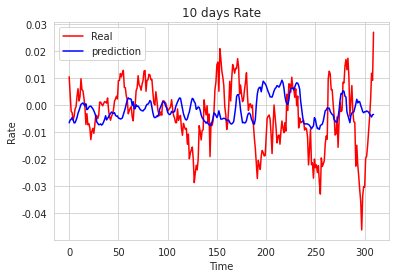

In [ ]:
# Visualising the results
plt.plot(real, color = 'red', label = 'Real')
plt.plot(pred, color = 'blue', label = 'prediction')
plt.title('10 days Rate')
plt.xlabel('Time')
plt.ylabel("Rate")
plt.legend(loc='best')
plt.show()

#### 다음 주 예측

In [ ]:
def predict_data(start, file):
  file_path = f'ohlcv_data/{file}'  # 파일 불러오기
  df = pd.read_csv(file_path)
  df = df[df.Date >= start].reset_index(drop=True)  # 시작하는 날짜보다 뒤에 있는 것만 가져오기
  return df

TIGER단기선진하이일드_predict = predict_data('2016-03-04', 'TIGER단기선진하이일드(H).csv')
TIGER단기선진하이일드_combined_predict = merge_data_set(TIGER단기선진하이일드_predict, feature_list)
test= TIGER단기선진하이일드_combined_predict.iloc[-time_step:]
test.drop(['Date', 'TIGER단기선진하이일드(H)_Close','TIGER단기선진하이일드(H)_Volume'],axis=1,inplace=True)

test=scaler_1.transform(test)
test.shape

(15, 41)

In [ ]:
test=test.reshape(1,time_step,41)
pred_TIGER단기선진하이일드 = regressor.predict(test)
pred_TIGER단기선진하이일드 = scaler_target.inverse_transform(pred_TIGER단기선진하이일드)[0]
pred_TIGER단기선진하이일드=pd.DataFrame({"prediction":pred_TIGER단기선진하이일드})
pred_TIGER단기선진하이일드.index = ['TIGER단기선진하이일드']

pred_TIGER단기선진하이일드.to_csv('Pred.csv', encoding='utf-8-sig', mode='a', header=False)

### KOSEF단기자금


In [ ]:
feature_list = total_feature_list
KOSEF단기자금_combined = merge_data_set(KOSEF단기자금, feature_list)
KOSEF단기자금_combined.tail()

,Date,Open,High,Low,Close,Volume,Rate,gold Price,natural_gas Price,oil Price,...,KOSEF국고채10년_Volume,KBSTAR중기우량회사채_Volume,TIGER원유선물(H)_Volume,TIGER차이나CSI300_Volume,KOSEF미국달러선물_Volume,KINDEX일본Nikkey225(H)_Volume,KODEX인버스_Volume,TIGER코스닥150_Volume,TIGER미국SP500선물(H)_Volume,TIGER단기선진하이일드(H)_Volume
1542,2022-06-13,101420,101425,101350,101395,6006,-0.000641,1873.800049,8.950,122.250000,...,9434444,6006,7717,101057,180265,22509,575,64700,3540,1689
1543,2022-06-14,101385,101390,101370,101385,390,-0.000542,1825.500000,8.889,123.680000,...,12194953,390,22270,445573,55982,26010,8907,68899,3241,1397
1544,2022-06-15,101375,101380,101360,101360,541,-0.000296,1839.000000,7.698,119.610001,...,10540450,541,6175,431278,14815,32000,1256,216203,809,1267
1545,2022-06-16,101330,101340,101305,101310,4013,0.000197,1850.599976,8.027,118.080002,...,9186440,4013,5864,305096,30329,30705,754,106074,7534,133
1546,2022-06-17,101290,101310,101290,101305,8868,0.000049,1853.699951,7.588,118.970001,...,7291657,8868,8482,642832,192865,45930,1504,55885,6671,46638


In [ ]:
KOSEF단기자금_combined.drop(['Date', 'KOSEF단기자금_Close','KOSEF단기자금_Volume'], axis=1, inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(KOSEF국고채10년_combined, test_size=0.2, shuffle=False)

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler_1 = MinMaxScaler()
scaler_target = MinMaxScaler()

train[train.columns.drop('Rate')] = scaler_1.fit_transform(train[train.columns.drop('Rate')])
test[train.columns.drop('Rate')] = scaler_1.transform(test[train.columns.drop('Rate')])

train[['Rate']] = scaler_target.fit_transform(train[['Rate']])
test[['Rate']] = scaler_target.transform(test[['Rate']])

In [ ]:
# Creating a data structure with n timesteps and 1 output
time_step = 30
y = train.Rate
train.drop('Rate', axis=1, inplace=True)
X_train = []
y_train = []
for i in range(time_step,len(train)):
  X_train.append(train.iloc[i-time_step:i,])
  y_train.append(y.iloc[i-time_step])
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 41))
X_train.shape

(1207, 30, 41)

#### Using pretrained model

In [ ]:
regressor = tf.keras.models.load_model('단기자금model.h5')

In [ ]:
# preprocessing the test dataset
# Creating a data structure with n timesteps
# 이전에 지정해주었던 test를 y_test로 사용하기로 한다.(Scaling은 되어 있음)
y_test = np.reshape(np.array(test.iloc[:,5]), (-1,1))
test.drop('Rate', axis=1, inplace=True)
total_data = np.concatenate([train, test], axis=0)

X_test = []
for i in range(len(total_data)-len(test), len(total_data)):
  X_test.append(total_data[i-time_step:i,:])
X_test = np.array(X_test)

# Reshaping
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 41))
X_test.shape

print(f"shape of X_test: {X_test.shape}")
print(f"shape of y_test: {y_test.shape}")

shape of X_test: (310, 30, 41)
shape of y_test: (310, 1)


In [ ]:
real = y_test
pred= regressor.predict(X_test)
real = scaler_target.inverse_transform(real)
pred = scaler_target.inverse_transform(pred)

print(f'RMSE: {np.sqrt(mean_squared_error(pred,real))}')
print(f'MAE: {mean_absolute_error(pred,real)}')
print(f'R2: {r2_score(pred, real)}')

RMSE: 0.013996956906571018
MAE: 0.01096394065044234
R2: -4.602858883987613


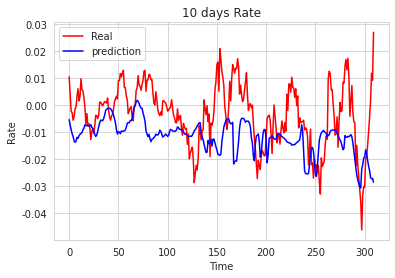

In [ ]:
# Visualising the results
plt.plot(real, color = 'red', label = 'Real')
plt.plot(pred, color = 'blue', label = 'prediction')
plt.title('10 days Rate')
plt.xlabel('Time')
plt.ylabel("Rate")
plt.legend(loc='best')
plt.show()

#### 다음 주 예측

In [ ]:
def predict_data(start, file):
  file_path = f'ohlcv_data/{file}'  # 파일 불러오기
  df = pd.read_csv(file_path)
  df = df[df.Date >= start].reset_index(drop=True)  # 시작하는 날짜보다 뒤에 있는 것만 가져오기
  return df

KOSEF단기자금_predict = predict_data('2016-03-04', 'KOSEF단기자금.csv')
KOSEF단기자금_combined_predict = merge_data_set(KOSEF단기자금_predict, feature_list)
test=KOSEF단기자금_combined_predict.iloc[-time_step:,:]
test.drop(['Date', 'KOSEF단기자금_Close','KOSEF단기자금_Volume'],axis=1,inplace=True)

test=scaler_1.transform(test)
test.shape

(30, 41)

In [ ]:
test=test.reshape(1,time_step,41)
pred_KOSEF단기자금 = regressor.predict(test)
pred_KOSEF단기자금 = scaler_target.inverse_transform(pred_KOSEF단기자금)[0]
pred_KOSEF단기자금=pd.DataFrame({"prediction":pred_KOSEF단기자금})
pred_KOSEF단기자금.index = ['KOSEF단기자금']

pred_KOSEF단기자금.to_csv('Pred.csv', encoding='utf-8-sig', mode='a', header=False)